# **Simulateur de méta-populations**

In [1]:
# Importation des librairies
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **Cas simples**
### 1. Simulation de la dynamique d'une espèce sur un site
#### 1. *Définition des variables globales*

In [5]:
#Variables générales
T = 20  # Nombre de générations

# Variables liées à l'espèce
N0 = 1  # Effectif initial
R = 2  # Taux de croissance maximal
MU = 0.1  # Taux de mortalité

# Variables liées au site
K = 200  # Capacité d'accueil

#### 2. *Définition des fonctions*

In [52]:
def generation1(n) :
    """ Fonction de croissance d'une population sur une génération

    Cette fonction calcule l'effectif à la génération suivante d'une population suivant une croissance logistique

    Paramètres
    ----------
    n : int
        Effectif de la population au temps t
    
    Return
    ------
    int
        Effectif de la population au temps t+1
    
    """
    return int((n + n*R*(1-(n/K)))*(1-MU))

#### 3. *Programme principal*

[1, 2, 5, 13, 33, 79, 157, 202, 178, 195, 184, 192, 186, 190, 188, 189, 188, 189, 188, 189]


Text(0, 0.5, 'Effectifs')

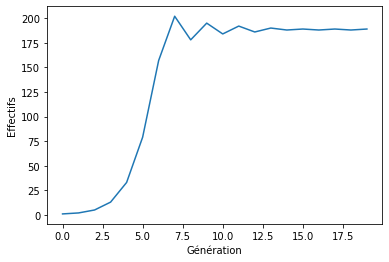

In [57]:
list_n = [N0]  # Liste des effectifs de la population à chaque pas de temps
for gen in range(0,T-1):
    list_n = list_n + [generation1(list_n[gen])]
print(list_n)
plt.plot(list_n)
plt.xlabel('Génération')
plt.ylabel('Effectifs')

### 2. Simulation de la dynamique de 2 espèces sur un site
#### 1. *Définition des variables globales*

In [34]:
# Variables générales
T = 20  # Nombre de générations

# Variables liées à l'espèce 1
N01 = 1  # Effectif initial
R1 = 2  # Taux de croissance maximal
MU1 = 0.1  # Taux de mortalité

# Variables liées à l'espèce 2
N02 = 1  # Effectif initial
R2 = 2  # Taux de croissance maximal
MU2 = 0.1  # Taux de mortalité

# Coefficients d'interaction entre les espèces
A = np.array([[1, 1], [1, 1]])

# Variables liées au site
K1 = 200  # Capacité d'accueil pour l'espèce 1
K2 = 200  # Capacité d'accueil pour l'espèce 2

#### 2. *Définition des fonctions*

In [40]:
def generation2(n) :
    """ Fonction de croissance de deux populations en compétition sur une génération

    Cette fonction calcule les effectifs à la génération suivante de deux populations suivant une croissance logistique, 
    en compétition de Lotka-Volterra

    Paramètres
    ----------
    n : list
        Effectifs des populations au temps t
    
    Return
    ------
    list
        Effectifs des populations au temps t+1
    
    """
    n1 = n[0]  # Effectif de la population 1 au temps t
    n2 = n[1]  # Effectif de la population 2 au temps t
    n1_plus = int((n1 + n1*R1*(1-((A[0][0]*n1+A[0][1]*n2)/K1)))*(1-MU1))  # Effectif de la population 1 au temps t+1
    n2_plus = int((n2 + n2*R2*(1-((A[1][1]*n2+A[1][0]*n1)/K2)))*(1-MU2))  # Effectif de la population 2 au temps t+1

    return [n1_plus,n2_plus]

#### 3. *Programme principal*

[1, 2, 5, 13, 32, 67, 100, 90, 97, 92, 96, 93, 95, 94, 94, 94, 94, 94, 94, 94]
[1, 2, 5, 13, 32, 67, 100, 90, 97, 92, 96, 93, 95, 94, 94, 94, 94, 94, 94, 94]


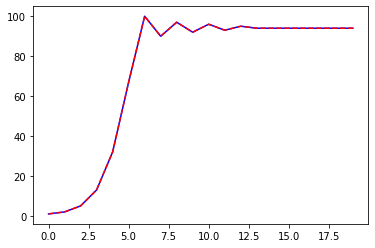

In [43]:
list_n1 = [N01]  # Liste des effectifs de la population 1 à chaque pas de temps
list_n2 = [N02]  # Liste des effectifs de la population 2 à chaque pas de temps

for gen in range(T):
    n_plus = generation2([list_n1[gen],list_n2[gen]])
    list_n1 = list_n1 + [n_plus[0]]
    list_n2 = list_n2 + [n_plus[1]]
print(list_n1)
print(list_n2)
plt.figure()
plt.plot(list_n1, 'b')
plt.plot(list_n2, 'r--')
plt.show()

### 3. Simulation de la dynamique d'une espèce sur 2 sites
#### 1. *Définition des variables globales*

In [55]:
#Variables générales
T = 20  # Nombre de générations

# Variables liées à l'espèce
R = 2  # Taux de croissance maximal
MU = 0.1  # Taux de mortalité
D = 0.1  # Taux de dispersion
C = 0.1  # Taux de mortalité lors de la dispersion

# Variables liées au site 1
N01 = 1  # Effectif initial au site 1
K1 = 200  # Capacité d'accueil du site 1

# Variables liées au site 2
N02 = 0
K2 = 200  # Capacité d'accueil du site 2

#### 2. *Définition des fonctions*

In [50]:
def dynamique_intra1(n) :
    """ Fonction de dynamique d'une population sur une génération à l'intérieur d'un site

    Cette fonction calcule l'effectif à la génération suivante d'une population suivant une croissance logistique
    sur un site, avec de la dispersion entre les sites

    Paramètres
    ----------
    n : int
        Effectif de la population au temps t
    
    Return
    ------
    array de taille 2
        Effectif de la population après reproduction et dispersion, et nombre de migrants issus du site
    
    """
    nb = generation1(n)  # Effectif après reproduction
    d = int(D*nb)

    return [nb-d,d]

def migration1(m) :
    """ Fonction de migration d'une espèce entre 2 sites

    Cette fonction répartit selon une distribution multinomiale un pool de migrants entre 2 sites

    Paramètres
    ----------
    m : int
        Pool de migrants
    
    Return
    ------
    list
        Effectifs de migrants dans chacun des sites
    
    """
    m = m - int(m*C)  # Application du taux de mortalité pendant la dispersion
    return np.random.multinomial(m, [0.5]*2)


#### 3. *Programme principal*

[1, 2, 5, 13, 33, 74, 143, 198, 180, 191, 184, 189, 183, 193, 180, 187, 192, 183, 190, 184]
[0, 0, 0, 0, 0, 5, 19, 50, 111, 188, 189, 188, 191, 183, 194, 189, 183, 192, 185, 192]


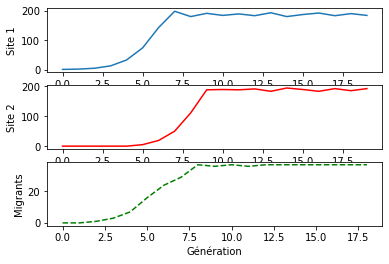

In [65]:
list_n1 = [N01]  # Liste des effectifs de la population au site 1 à chaque pas de temps
list_n2 = [N02]  # Liste des effectifs de la population au site 2 à chaque pas de temps
disp = []  # Liste des tailles du pool de migrants

for gen in range(0,T-1):
    n1_plus = dynamique_intra1(list_n1[gen])
    n2_plus = dynamique_intra1(list_n2[gen])
    disp = disp + [n1_plus[1] + n2_plus[1]]  # Pool de migrants
    mig = migration1(disp[gen])
    list_n1 = list_n1 + [n1_plus[0] + mig[0]]
    list_n2 = list_n2 + [n2_plus[0] + mig[1]]
print(list_n1)
print(list_n2)
plt.figure()
plt.subplot(311)
plt.plot(list_n1)
plt.ylabel('Site 1')
plt.subplot(312)
plt.plot(list_n2, 'r')
plt.ylabel('Site 2')
plt.subplot(313)
plt.plot(disp, 'g--')
plt.ylabel('Migrants')
plt.xlabel('Génération')
plt.show()


## **Cas plus complexes**
### 1. Généralisation de la dynamique intra-site pour R espèces
#### 1. Définition des variables globales

In [68]:
#Variables générales
T = 20  # Nombre de générations

# Variables liées aux espèces (R = 3)
N0 = [1, 1, 1]  # Effectif initial
R = [2, 2, 2]  # Taux de croissance maximal
MU = [0.1, 0.1, 0.1]  # Taux de mortalité
A = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

# Variables liées au site
K = 200  # Capacité d'accueil

#### 2. Définition des fonctions

In [71]:
def interaction(n, a, i) :
    """ Fonction d'interaction d'une espèce i parmi R espèces

    Cette fonction calcule le membre 'somme(alpha_{ij}*N_j)' de l'équation de compétition de Lotka-Volterra pour l'espèce i

    Paramètres
    ----------
    n : liste de taille R
        Effectifs des R espèces
    a : array de taille R*R
        Matrice des coefficients d'interaction entre les R espèces
    i : int
        Identifiant de l'espèce d'intérêt
    
    Return
    ------
    float
        somme(alpha_{ij}*N_j)
    
    """
    alpha = a[i]  # Sélection des coefficients d'interaction de l'espèce i avec les R espèces
    inter = n*alpha  # alpha_{ij}*N_j
    return sum(inter)

def reproduction(n, i) :
    """ Fonction de croissance d'une espèce en compétition avec d'autres sur une génération

    Cette fonction calcule l'effectif après reproduction d'une population suivant une croissance logistique, en compétition
    de Lotka-Volterra avec d'autres espèces

    Paramètres
    ----------
    n : list
        Effectif des espèces au temps t
    i : int
        Identifiant de l'espèce d'intérêt
    
    Return
    ------
    int
        Effectif de la population après reproduction et mortalité au temps t
    
    """
    return int((n[i] + n[i]*R[i]*(1-(interaction(n, A, i)/K)))*(1-MU[i]))

#### 3. *Programme principal*

In [87]:
list_n = [N0]  # Liste des effectifs des espèces à chaque pas de temps

for gen in range(0,T-1):
    list_n = list_n + [[reproduction(list_n[gen], i) for i in range(0, len(N0))]]
list_n = np.array(list_n).T  # Transposée de la matrice T*R pour 
print(list_n)

[[ 1  2  5 12 28 54 67 59 65 61 64 62 63 62 63 62 63 62 63 62]
 [ 1  2  5 12 28 54 67 59 65 61 64 62 63 62 63 62 63 62 63 62]
 [ 1  2  5 12 28 54 67 59 65 61 64 62 63 62 63 62 63 62 63 62]]


### 2. Généralisation de la dispersion à X sites
#### 1. *Définition des variables globales*

In [165]:
#Variables générales
T = 20  # Nombre de générations
X = 3

# Variables liées à l'espèce
N0 = [1] + [0]*(X-1)
R = 2  # Taux de croissance maximal
MU = 0.1  # Taux de mortalité
D = 0.1  # Taux de dispersion
C = 0.1  # Taux de mortalité lors de la dispersion

# Variables liées aux sites
K = [200]*X

#### 2. *Définition des fonctions*

In [166]:
# Réutilisation de 'migration'

def generation3(n, x) :
    """ Fonction de croissance d'une population sur une génération au site x

    Cette fonction calcule l'effectif à la génération suivante d'une population suivant une croissance logistique au site x

    Paramètres
    ----------
    n : int
        Effectif de la population au temps t
    x : int
        Identifiant du site x
    
    Return
    ------
    int
        Effectif de la population au temps t+1
    
    """
    return int((n + n*R*(1-(n/K[x])))*(1-MU))

def dynamique_intra2(n, x) :
    """ Fonction de dynamique d'une population sur une génération à l'intérieur d'un site x

    Cette fonction calcule l'effectif à la génération suivante d'une population suivant une croissance logistique
    sur un site x, avec de la dispersion entre les X sites

    Paramètres
    ----------
    n : int
        Effectif de la population au temps t au site x
    x : int
        Identifiant du site x
    
    Return
    ------
    array de taille 2
        Effectif de la population après reproduction et dispersion, et nombre de migrants issus du site x
    
    """
    n = n[x]
    nb = generation3(n, x)  # Effectif après reproduction
    d = int(D*nb)

    return [nb-d,d]

def dynamique_inter1(n) :
    """ Fonction de dynamique d'une population sur une génération entre plusieurs sites

    Cette fonction calcule l'effectif à la génération suivante d'une population suivant une croissance logistique
    sur plusieurs sites, avec de la dispersion entre les sites

    Paramètres
    ----------
    n : list
        Effectif de la population sur chaque site au temps t
    
    Return
    ------
    array de taille 2
        Effectif de la population après reproduction et dispersion, et nombre de migrants issus du site
    
    """
    intra = [dynamique_intra2(n, x) for x in range(0, X)]
    d = sum(np.array(intra).T[1])
    mig = migration2(d)
    n_plus = list(np.array(intra).T[0] + mig)
    return [n_plus, d]

def migration2(m) :
    """ Fonction de migration d'une espèce entre X sites

    Cette fonction répartit selon une distribution multinomiale un pool de migrants entre X sites

    Paramètres
    ----------
    m : int
        Pool de migrants
    
    Return
    ------
    list
        Effectifs de migrants dans chacun des sites
    
    """
    m = m - int(m*C)  # Application du taux de mortalité pendant la dispersion
    return np.random.multinomial(m, [1/X]*X)
    

In [109]:
dynamique_inter1(N0)

[array([2, 0, 0]), 0]

#### 3. *Programme principal*

In [167]:
list_n = [N0]  # Liste des effectifs de la population sur chaque site à chaque pas de temps
disp = []  # Liste des tailles du pool de migrants

for gen in range(0,T-1):
    n_plus = dynamique_inter1(list_n[gen])
    list_n = list_n + [n_plus[0]]
    disp = disp + [n_plus[1]]
print(np.array(list_n).T)
print(disp)

[[  1   2   5  12  30  68 130 185 182 192 189 182 183 188 189 183 196 180
  190 181]
 [  0   0   0   0   0   0   8  28  75 151 199 175 197 186 185 188 188 189
  187 194]
 [  0   0   0   1   3  12  33  83 160 197 177 201 183 187 190 191 179 192
  186 188]]
[0, 0, 1, 3, 7, 17, 28, 41, 54, 56, 55, 55, 56, 56, 55, 55, 55, 55, 56]


## Cas général 
### 1. Dynamique de R espèces dans X sites
#### 1. Définition des variables globales

In [253]:
# Variables générales
T = 20  # Nombre de générations
X = 4 # Nombre de sites
E = 3

# Variables liées aux espèces (E=3)
N0 = np.array([np.random.multinomial(3, [1/X]*X) for i in range(E)]).T  # Effectif initial
R = [2, 2, 2]  # Taux de croissance maximal
MU = [0.1, 0.1, 0.1]  # Taux de mortalité
A = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
D = [0.05, 0.05, 0.05]  # Taux de dispersion
C = [0.1, 0.1, 0.1]  # Taux de mortalité lors de la dispersion

# Variables liées au site
K = [200]*X  # Capacité d'accueil

In [199]:
np.array([np.random.multinomial(3, [1/E]*E) for x in range(X)])

array([[1, 0, 2],
       [0, 1, 2],
       [2, 1, 0],
       [2, 0, 1]])

#### 2. Définition des fonctions

Fonctions liées au modèle

In [189]:
def interaction(n, a, i) :
    """ Fonction d'interaction d'une espèce i parmi R espèces

    Cette fonction calcule le membre 'somme(alpha_{ij}*N_j)' de l'équation de compétition de Lotka-Volterra pour l'espèce i

    Paramètres
    ----------
    n : liste de taille R
        Effectifs des R espèces
    a : array de taille R*R
        Matrice des coefficients d'interaction entre les R espèces
    i : int
        Identifiant de l'espèce d'intérêt
    
    Return
    ------
    float
        somme(alpha_{ij}*N_j)
    
    """
    alpha = a[i]  # Sélection des coefficients d'interaction de l'espèce i avec les R espèces
    inter = n*alpha  # alpha_{ij}*N_j
    return sum(inter)

def reproduction(n, a, i, x) :
    """ Fonction de croissance d'une espèce en compétition avec d'autres sur une génération

    Cette fonction calcule l'effectif après reproduction d'une population suivant une croissance logistique, en compétition
    de Lotka-Volterra avec d'autres espèces

    Paramètres
    ----------
    n : list
        Effectif des espèces au temps t
    i : int
        Identifiant de l'espèce d'intérêt
    
    Return
    ------
    int
        Effectif de la population après reproduction et mortalité au temps t
    
    """
    n = list(n[x])
    return int((n[i] + n[i]*R[i]*(1-(interaction(n, a, i)/K[x])))*(1-MU[i]))

def dynamique_intra(n, x) :
    """ Fonction de dynamique de R espèces sur une génération à l'intérieur d'un site x

    Cette fonction calcule l'effectif à la génération suivante pour R espèces suivant une croissance logistique
    sur un site x, avec de la dispersion entre les X sites

    Paramètres
    ----------
    n : int
        Effectif de la population au temps t au site x
    x : int
        Identifiant du site x
    
    Return
    ------
    array de taille 2
        Effectif de chaque espèce après reproduction et dispersion, et nombre de migrants issus du site x
    
    """
    nb = np.array([reproduction(n, A, i, x) for i in range(E)])  # Effectif après reproduction
    d = np.array([int(D[i]*nb[i]) for i in range(E)])

    return [nb-d,d]

def effectif(n) : 
    """ Fonction de tri des effectif des espèces

    Cette fonction traite les données inssues de la fonction dynamique_intra et regroupe d'une part les effectifs de 
    chaque espèce dans chaque site dans une matrice R*X, et d'autre part les pools de migrant de chaque espèce dans une liste

    Paramètres
    ----------
    n : array de taille X*R*2
        Effectif de chaque espèces et migrants issus de chaque site
    
    Return
    ------
    list(array, list)
        Liste avec la matrice des effectifs de chaque espèce dans chaque site, et la liste des pools de migrant de chaque espèce
    
    """
    site = np.array([n[x][0] for x in range(X)])
    pool = np.array([n[x][1] for x in range(X)])
    pool = list(np.sum(pool,0))
    return list([site, pool])

def migration(m, i) :
    """ Fonction de migration d'une espèce i entre X sites

    Cette fonction répartit selon une distribution multinomiale un pool de migrants entre X sites

    Paramètres
    ----------
    m : int
        Pool de migrants
    
    Return
    ------
    list
        Effectifs de migrants dans chacun des sites
    
    """
    m = m[i] - int(m[i]*C[i])  # Application du taux de mortalité pendant la dispersion
    return np.random.multinomial(m, [1/X]*X)

def dynamique_inter(n) :
    """ Fonction de dynamique d'une population sur une génération entre plusieurs sites

    Cette fonction calcule l'effectif à la génération suivante d'une population suivant une croissance logistique
    sur plusieurs sites, avec de la dispersion entre les sites

    Paramètres
    ----------
    n : list
        Effectif de la population sur chaque site au temps t
    
    Return
    ------
    array de taille 2
        Effectif de la population après reproduction et dispersion dans chaque site, et nombre de migrants de chaque espèce
    
    """
    intra = np.array([dynamique_intra(n, x) for x in range(X)])  # Calcul des effectifs et des migrants de chaque site
    eff = effectif(intra)  # Tri des effectifs
    d = eff[1]  # Sélection des pools de migrants
    mig = np.array([migration(d,i) for i in range(E)]).T  # Répartition des migrants entre les sites
    n_plus = eff[0]+ mig  # Effectifs de chaque espèce dans chaque site à la fin de la génération
    return [n_plus, d]


Fonctions liées à la visualisation des résultats

In [261]:
def visualisation(a) :
    """ Fonction de visualisation de la dynamique de R espèces dans X sites
    Cette fonction crée une figure permettant de visualiser les résultats de dynamique_inter 
    
    Paramètres
    ----------
    a : list
        Effectifs de chaque espèce sur chaque site pour T générations
    
    Return
    ------
    figure
    
    """
    f = math.ceil(math.sqrt(X))
    fig = plt.figure(1, figsize=(20,15))
    for x in range(0,X) :
        ax = fig.add_subplot(f,f,x+1)
        for i in range(0, len(C)):
            ax.plot(a[i][x])
    plt.show()
    

#### 3. *Programme principal*

[[0 0 0]
 [0 3 2]
 [1 0 0]
 [2 0 1]]


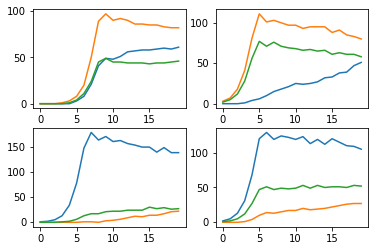

[[ 0  0  1  4 10 13 15 15 16 17 17 16 16 15 15 15 15 17 17]
 [ 0  0  2  4  5  6  7  8  9  8  8  8  8  8  9  9  9  9 10]
 [ 0  0  1  3  6  5  6  7  7  8  8  8  8  8  8  8  8  8  7]]


In [258]:
print(N0)
list_n = [N0]  # Liste des effectifs de la population sur chaque site à chaque pas de temps
disp = []  # Liste des tailles du pool de migrants

for gen in range(0,T-1):
    n_plus = dynamique_inter(list_n[gen])
    list_n = list_n + [n_plus[0]]
    disp = disp + [n_plus[1]]
list_n = np.array(list_n).T  # Données regroupées par espèce plutôt que par pas de temps
disp = np.array(disp).T
visualisation(list_n)
print(disp)

### 2. Ajout d'un planning de disponibilité aléatoire des sites

#### 1. *Définition des variables*

In [ ]:
# Variables globales
T = 200
X = 100
E = 3
PALL = 0.05  # probabilité d'allumage d'un site éteint au temps t
PEXT = 0.05  # probilité d'extinction d'un site allumé au temps t

# Variables liées aux espèces (E = 3)
R = [2]*E  # Taux de croissance maximal
MU = [0.1]*E  # Taux de mortalité
A = np.array([[1]*E]*E)
D = [0.1]*E  # Taux de dispersion
C = [0.5]*E  # Taux de mortalité lors de la dispersion

# Variables liées au site
K = [200]*X  # Capacité d'accueil

#### 2. *Définition des fonctions*

In [91]:
# Réutilisation des fonctions de la partie précédentes

def alea(v) :
    """ Fonction de sélection aléatoire des sites disponibles au temps t+1
    
    Paramètres
    ----------
    v : list
        Statut des sites au temps t (0 ou 1)
    
    Return
    ------
    list
        Statut des sites au temps t+1 (0 ou 1)
    
    """

    all_t = [i for i in range(len(v)) if v[i]==1]
    ext_t = [i for i in range(len(v)) if v[i]==0]

    all_tplus = random.sample(ext_t, np.random.binomial(len(ext_t), PALL))
    ext_tplus = random.sample(all_t, np.random.binomial(len(all_t), PEXT))

    for i in all_tplus :
        v[i] = 1
    for i in ext_tplus :
        v[i] = 0
    
    return v


#### 3. *Programme principal*

In [344]:
# Génération de la disponibilité des sites
states = [1]*X  # état initial des sites
dispo = [states]
for gen in range(T-1) :
    state = np.array(alea(dispo[gen])).T
    dispo = dispo + [state]

In [345]:
# Génération des effectifs initiaux
N0 = np.array([[1]*E]*X)  # Effect initial réparti de façon homogène
#N0 = np.array([np.random.multinomial(X, [1/X]*X) for i in range(E)]).T  # Effectif initial réparti aléatoirement

In [346]:
list_n = [N0]  # Liste des effectifs de la population sur chaque site à chaque pas de temps
disp = []  # Liste des tailles du pool de migrants

for gen in range(T-1) :
    n_plus = dynamique_inter(list_n[gen])
    n_plus[0] = np.array([n_plus[0].T[e]*dispo[gen] for e in range(E)]).T
    list_n = list_n + [n_plus[0]]
    disp = disp + [n_plus[1]]

list_n = np.array(list_n).T  # Données regroupées par espèce plutôt que par pas de temps
disp = np.array(disp).T

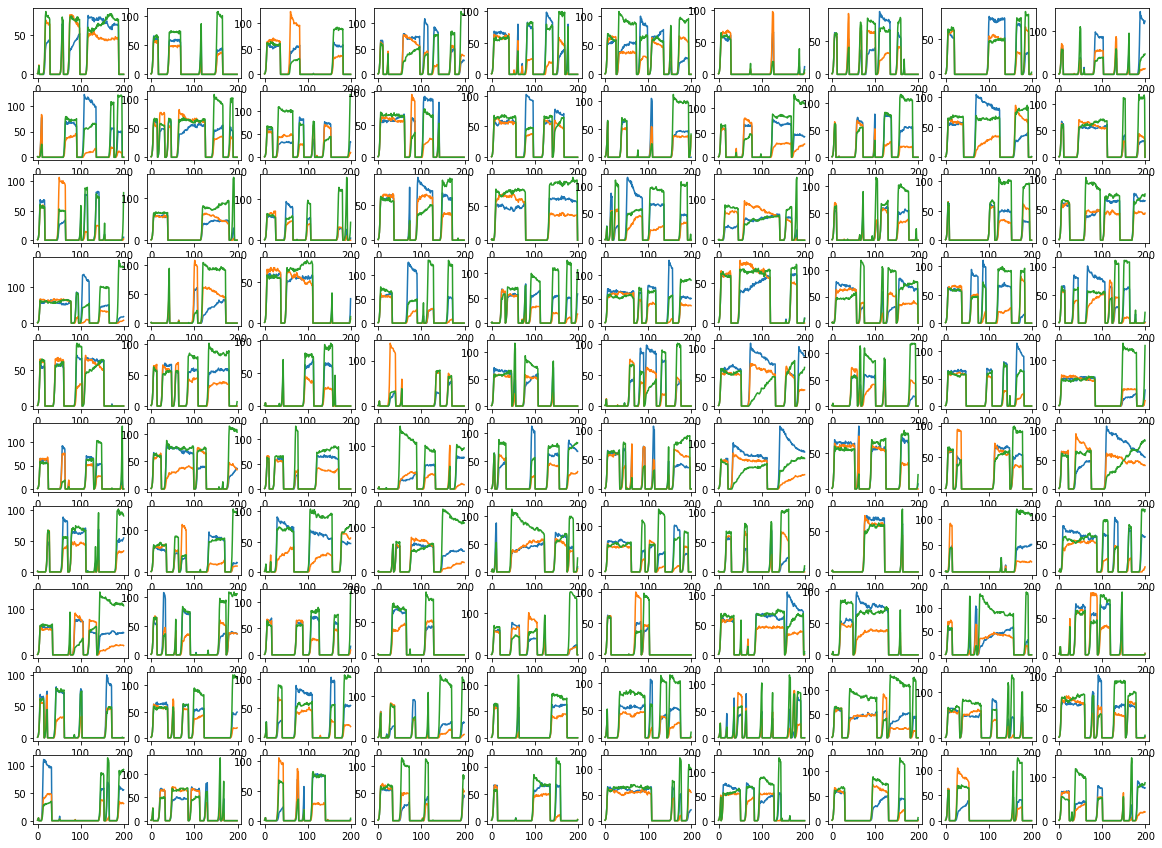

[[  0   0  88 167 346 440 407 422 427 421 416 403 390 399 369 351 342 313
  315 321 319 314 313 309 293 294 288 297 299 287 288 297 296 284 267 272
  264 250 248 250 259 260 258 263 257 259 259 257 247 255 264 247 256 239
  251 270 283 288 297 303 307 298 282 278 267 253 241 237 241 238 246 272
  288 273 276 279 284 301 303 306 315 318 313 312 310 319 317 302 321 328
  331 324 321 314 319 316 311 309 325 318 319 295 311 306 320 342 351 366
  360 376 360 361 347 340 332 338 313 305 307 293 294 304 304 302 296 299
  289 282 277 270 264 249 252 261 264 263 245 231 232 245 247 231 207 195
  204 210 227 231 241 235 235 245 255 251 237 260 267 256 263 279 290 300
  308 307 294 303 293 286 275 265 258 239 230 234 229 218 218 211 185 180
  193 183 170 181 191 202 211 216 216 215 211 202 191 184 180 178 177 169
  175]
 [  0   0  88 167 349 435 406 419 425 419 411 387 382 387 362 352 340 315
  314 321 322 327 329 327 316 319 316 321 321 309 308 321 313 293 272 278
  274 264 263 254 259 248 249 2

In [347]:
visualisation(list_n)
print(disp)

### 3. Ajout d'un effet ressource variable entre les espèces

#### 1. *Définition des variables*

In [87]:
# Variables globales
NITER = 250  # Nombre ditérations
T = 200  # Nombre de pas de temps
X = 36  # Nombre de sites
E = 3  # Nombre d'espèces
H = 2  # Nombre de ressources

PALL = 0.05  # probabilité d'allumage d'un site éteint au temps t
PEXT = 0.05  # probilité d'extinction d'un site allumé au temps t

# Variables liées aux espèces
R = [2]*E  # Taux de croissance maximal
MU = [0.1]*E  # Taux de mortalité
A = np.array([[1]*E]*E)
D = [0.1]*E  # Taux de dispersion
C = [0.5]*E  # Taux de mortalité lors de la dispersion

# Génération des effectifs initiaux
N0 = np.array([[1]*E]*X)  # Effect initial réparti de façon homogène
#N0 = np.array([np.random.multinomial(X, [1/X]*X) for i in range(E)]).T  # Effectif initial réparti aléatoirement

# Variables liées à l'exploitation des ressources (E = 3, H = 2)
K0 = 200
EXP = np.array([[0.9, 0.9, 0],[0.9, 0.9, 1]])  # Coefficients d'exploitation des ressources
RES = np.array([[K0]*E]*H) * EXP  # Capacité d'accueil des ressources

# Variables liées au site
RES_X = [random.randrange(H) for x in range(X)]  # Ressource présente dans chaque site
K = [RES[RES_X[x]] for x in range(X)]  # Capacité d'accueil du site

# Génération de la disponibilité des sites
STATES = [1]*X  # état initial des sites
DISPO = [STATES]
for gen in range(T-1) :
    state = np.array(alea(DISPO[gen])).T
    DISPO = DISPO + [state]

#### 2. *Définition des fonctions*

Fonctions de génération des sites

In [3]:
def alea(v) :
    """ Fonction de sélection aléatoire des sites disponibles au temps t+1
    
    Paramètres
    ----------
    v : list
        Statut des sites au temps t (0 ou 1)
    
    Return
    ------
    list
        Statut des sites au temps t+1 (0 ou 1)
    
    """

    all_t = [i for i in range(len(v)) if v[i]==1]
    ext_t = [i for i in range(len(v)) if v[i]==0]

    all_tplus = random.sample(ext_t, np.random.binomial(len(ext_t), PALL))
    ext_tplus = random.sample(all_t, np.random.binomial(len(all_t), PEXT))

    for i in all_tplus :
        v[i] = 1
    for i in ext_tplus :
        v[i] = 0
    
    return v

Fonctions liées au modèle

In [9]:
def interaction(n, a, i) :
    """ Fonction d'interaction d'une espèce i parmi R espèces

    Cette fonction calcule le membre 'somme(alpha_{ij}*N_j)' de l'équation de compétition de Lotka-Volterra pour l'espèce i

    Paramètres
    ----------
    n : liste de taille R
        Effectifs des R espèces
    a : array de taille R*R
        Matrice des coefficients d'interaction entre les R espèces
    i : int
        Identifiant de l'espèce d'intérêt
    
    Return
    ------
    float
        somme(alpha_{ij}*N_j)
    
    """
    alpha = a[i]  # Sélection des coefficients d'interaction de l'espèce i avec les R espèces
    inter = n*alpha  # alpha_{ij}*N_j
    return sum(inter)

def reproduction(n, a, i, x) :
    """ Fonction de croissance d'une espèce en compétition avec d'autres sur une génération

    Cette fonction calcule l'effectif après reproduction d'une population suivant une croissance logistique, en compétition
    de Lotka-Volterra avec d'autres espèces

    Paramètres
    ----------
    n : list
        Effectif des espèces au temps t
    i : int
        Identifiant de l'espèce d'intérêt
    
    Return
    ------
    int
        Effectif de la population après reproduction et mortalité au temps t
    
    """
    n = list(n[x])
    if K[x][i]==0 :
        return 0
    else :
        return int((n[i] + n[i]*R[i]*(1-(interaction(n, a, i)/K[x][i])))*(1-MU[i]))

def dynamique_intra(n, x) :
    """ Fonction de dynamique de R espèces sur une génération à l'intérieur d'un site x

    Cette fonction calcule l'effectif à la génération suivante pour R espèces suivant une croissance logistique
    sur un site x, avec de la dispersion entre les X sites

    Paramètres
    ----------
    n : int
        Effectif de la population au temps t au site x
    x : int
        Identifiant du site x
    
    Return
    ------
    array de taille 2
        Effectif de chaque espèce après reproduction et dispersion, et nombre de migrants issus du site x
    
    """
    nb = np.array([reproduction(n, A, i, x) for i in range(E)])  # Effectif après reproduction
    d = np.array([int(D[i]*nb[i]) for i in range(E)])

    return [nb-d,d]

def effectif(n) : 
    """ Fonction de tri des effectif des espèces

    Cette fonction traite les données inssues de la fonction dynamique_intra et regroupe d'une part les effectifs de 
    chaque espèce dans chaque site dans une matrice R*X, et d'autre part les pools de migrant de chaque espèce dans une liste

    Paramètres
    ----------
    n : array de taille X*R*2
        Effectif de chaque espèces et migrants issus de chaque site
    
    Return
    ------
    list(array, list)
        Liste avec la matrice des effectifs de chaque espèce dans chaque site, et la liste des pools de migrant de chaque espèce
    
    """
    site = np.array([n[x][0] for x in range(X)])
    pool = np.array([n[x][1] for x in range(X)])
    pool = list(np.sum(pool,0))
    return list([site, pool])

def migration(m, i) :
    """ Fonction de migration d'une espèce i entre X sites

    Cette fonction répartit selon une distribution multinomiale un pool de migrants entre X sites

    Paramètres
    ----------
    m : int
        Pool de migrants
    
    Return
    ------
    list
        Effectifs de migrants dans chacun des sites
    
    """
    m = m[i] - int(m[i]*C[i])  # Application du taux de mortalité pendant la dispersion
    return np.random.multinomial(m, [1/X]*X)

def dynamique_inter(n) :
    """ Fonction de dynamique d'une population sur une génération entre plusieurs sites

    Cette fonction calcule l'effectif à la génération suivante d'une population suivant une croissance logistique
    sur plusieurs sites, avec de la dispersion entre les sites

    Paramètres
    ----------
    n : list
        Effectif de la population sur chaque site au temps t
    
    Return
    ------
    array de taille 2
        Effectif de la population après reproduction et dispersion dans chaque site, et nombre de migrants de chaque espèce
    
    """
    intra = np.array([dynamique_intra(n, x) for x in range(X)])  # Calcul des effectifs et des migrants de chaque site
    eff = effectif(intra)  # Tri des effectifs
    d = eff[1]  # Sélection des pools de migrants
    mig = np.array([migration(d,i) for i in range(E)]).T  # Répartition des migrants entre les sites
    n_plus = eff[0]+ mig  # Effectifs de chaque espèce dans chaque site à la fin de la génération
    return [n_plus, d]

Fonctions de visualisation

In [90]:
def visualisation(mean, sd) :
    """ Fonction de visualisation de la dynamique de R espèces dans X sites
    Cette fonction crée une figure permettant de visualiser les résultats de dynamique_inter 
    
    Paramètres
    ----------
    a : list
        Effectifs de chaque espèce sur chaque site pour T générations
    
    Return
    ------
    figure
    
    """
    palette = sns.color_palette(None, H+E)  # Palette pour le fond des graphes

    site_res = []
    for h in range(H) :
        site_res = site_res + [i for i in range(X) if RES_X[i]==h]  # Tri des sites par ressource
    
    f = math.ceil(math.sqrt(X))  # Taille de la figure : f*f
    fig = plt.figure(1, figsize=(20,15))
    
    for x in range(X) :
        ax = fig.add_subplot(f,f,x+1)
        #[i.set_linewidth(2) for i in ax.spines.values()]
        #[spine.set_edgecolor(palette[RES_X[x]]) for spine in ax.spines.values()]
        ax.fill_between(range(T), 0, K0, where=(np.array(DISPO).T[site_res[x]]==1), color=palette[RES_X[site_res[x]]+E], alpha=0.15)
        for i in range(E):
            a = mean[i][site_res[x]]-sd[i][site_res[x]]
            a[a < 0] = 0
            ax.fill_between(range(T), mean[i][site_res[x]]-sd[i][site_res[x]], mean[i][site_res[x]]+sd[i][site_res[x]], color='white', alpha=1)

        for i in range(E):
            a = mean[i][site_res[x]]-sd[i][site_res[x]]
            a[a < 0] = 0
            ax.fill_between(range(T), a, mean[i][site_res[x]]+sd[i][site_res[x]], color=palette[i], alpha=0.35)
            ax.plot(mean[i][site_res[x]], '--', color = palette[i])
    plt.show()

#### 3. Programme principal

In [88]:
list_iter = []

for iter in range(NITER) :
    list_n = [N0]  # Liste des effectifs de la population sur chaque site à chaque pas de temps
    disp = []  # Liste des tailles du pool de migrants

    for gen in range(T-1) :
        n_plus = dynamique_inter(list_n[gen])
        n_plus[0] = np.array([n_plus[0].T[e]*DISPO[gen] for e in range(E)]).T
        list_n = list_n + [n_plus[0]]
        disp = disp + [n_plus[1]]

    list_n = np.array(list_n).T  # Données regroupées par espèce plutôt que par pas de temps
    disp = np.array(disp).T
    list_iter = list_iter + [list_n]

list_iter = np.array(list_iter)
mean_iter = np.mean(list_iter, axis=0)
sd_iter = np.std(list_iter, axis=0)

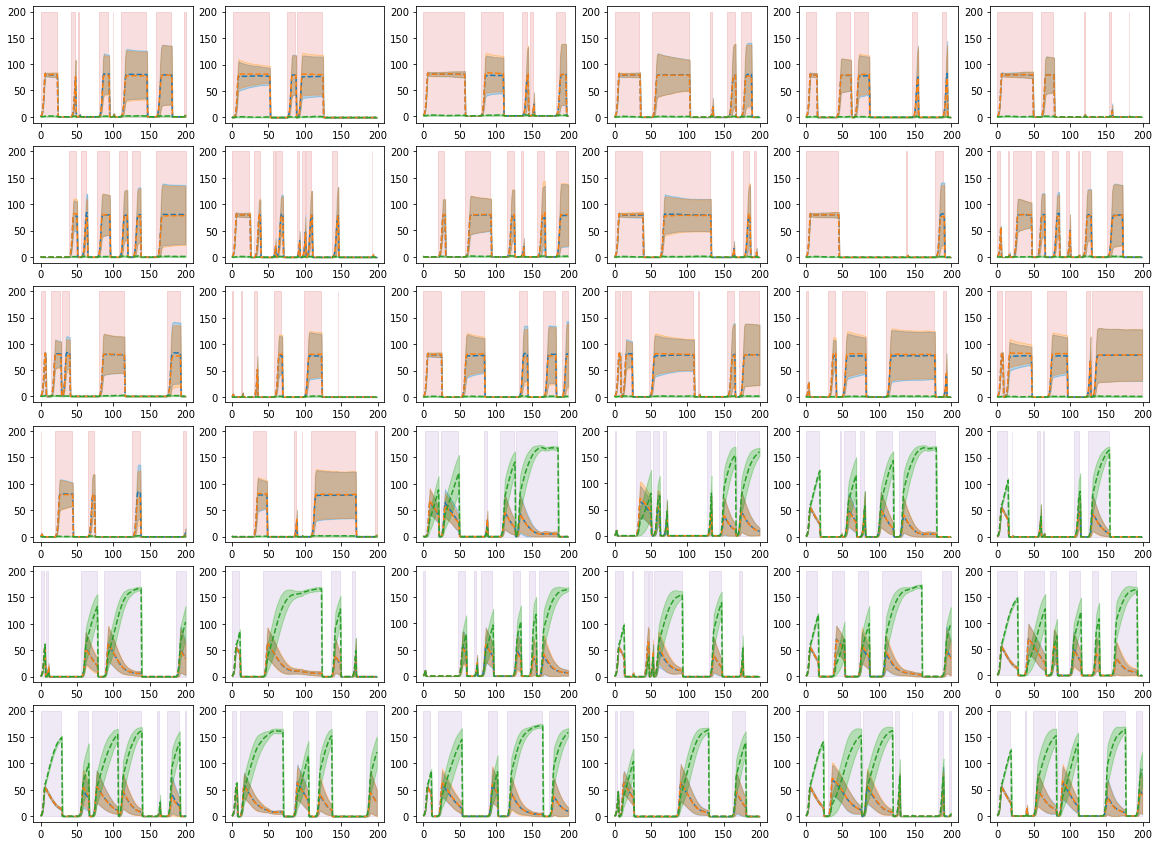

In [91]:
visualisation(mean_iter, sd_iter)

### 4. Généralisation pour E espèces, généralistes ou spécialistes

#### 1. *Définition des variables*

In [108]:
# Variables globales
NITER = 250  # Nombre ditérations
T = 200  # Nombre de pas de temps
X = 25  # Nombre de sites
E = 2  # Nombre d'espèces
H = 2  # Nombre de ressources

PALL = 0.05  # probabilité d'allumage d'un site éteint au temps t
PEXT = 0.05  # probilité d'extinction d'un site allumé au temps t

# Variables liées aux espèces
# Génération des effectifs initiaux
N0 = np.array([[1]*E]*X)  # Effect initial réparti de façon homogène
#N0 = np.array([np.random.multinomial(X, [1/X]*X) for i in range(E)]).T  # Effectif initial réparti aléatoirement

R = [2]*E  # Taux de croissance maximal
MU = [0.1]*E  # Taux de mortalité
A_INTRA = 1
A_INTER = 1.7
A = np.array([[A_INTER]*E]*E)
for i in range(E) :
    A[i,i] = A_INTRA
D = [0.1]*E  # Taux de dispersion
C = [0.5]*E  # Taux de mortalité lors de la dispersion

# Variables liées à l'exploitation des ressources (E = 3, H = 2)
K0 = 200
SP = [1, 0]
GE = 0.9

#### 2. *Définition des fonctions*

Fonctions réuitilisées

In [58]:
def alea(v) :
    """ Fonction de sélection aléatoire des sites disponibles au temps t+1
    
    Paramètres
    ----------
    v : list
        Statut des sites au temps t (0 ou 1)
    
    Return
    ------
    list
        Statut des sites au temps t+1 (0 ou 1)
    
    """

    all_t = [i for i in range(len(v)) if v[i]==1]
    ext_t = [i for i in range(len(v)) if v[i]==0]

    all_tplus = random.sample(ext_t, np.random.binomial(len(ext_t), PALL))
    ext_tplus = random.sample(all_t, np.random.binomial(len(all_t), PEXT))

    for i in all_tplus :
        v[i] = 1
    for i in ext_tplus :
        v[i] = 0
    
    return v
def interaction(n, a, i) :
    """ Fonction d'interaction d'une espèce i parmi R espèces

    Cette fonction calcule le membre 'somme(alpha_{ij}*N_j)' de l'équation de compétition de Lotka-Volterra pour l'espèce i

    Paramètres
    ----------
    n : liste de taille R
        Effectifs des R espèces
    a : array de taille R*R
        Matrice des coefficients d'interaction entre les R espèces
    i : int
        Identifiant de l'espèce d'intérêt
    
    Return
    ------
    float
        somme(alpha_{ij}*N_j)
    
    """
    alpha = a[i]  # Sélection des coefficients d'interaction de l'espèce i avec les R espèces
    inter = n*alpha  # alpha_{ij}*N_j
    return sum(inter)
def reproduction(n, a, i, x) :
    """ Fonction de croissance d'une espèce en compétition avec d'autres sur une génération

    Cette fonction calcule l'effectif après reproduction d'une population suivant une croissance logistique, en compétition
    de Lotka-Volterra avec d'autres espèces

    Paramètres
    ----------
    n : list
        Effectif des espèces au temps t
    i : int
        Identifiant de l'espèce d'intérêt
    
    Return
    ------
    int
        Effectif de la population après reproduction et mortalité au temps t
    
    """
    n = list(n[x])
    if K[x][i]==0 :
        return 0
    else :
        return int((n[i] + n[i]*R[i]*(1-(interaction(n, a, i)/K[x][i])))*(1-MU[i]))
def dynamique_intra(n, x) :
    """ Fonction de dynamique de R espèces sur une génération à l'intérieur d'un site x

    Cette fonction calcule l'effectif à la génération suivante pour R espèces suivant une croissance logistique
    sur un site x, avec de la dispersion entre les X sites

    Paramètres
    ----------
    n : int
        Effectif de la population au temps t au site x
    x : int
        Identifiant du site x
    
    Return
    ------
    array de taille 2
        Effectif de chaque espèce après reproduction et dispersion, et nombre de migrants issus du site x
    
    """
    nb = np.array([reproduction(n, A, i, x) for i in range(E)])  # Effectif après reproduction
    nb[nb < 0] = 0
    d = np.array([int(D[i]*nb[i]) for i in range(E)])

    return [nb-d,d]
def effectif(n) : 
    """ Fonction de tri des effectif des espèces

    Cette fonction traite les données inssues de la fonction dynamique_intra et regroupe d'une part les effectifs de 
    chaque espèce dans chaque site dans une matrice R*X, et d'autre part les pools de migrant de chaque espèce dans une liste

    Paramètres
    ----------
    n : array de taille X*R*2
        Effectif de chaque espèces et migrants issus de chaque site
    
    Return
    ------
    list(array, list)
        Liste avec la matrice des effectifs de chaque espèce dans chaque site, et la liste des pools de migrant de chaque espèce
    
    """
    site = np.array([n[x][0] for x in range(X)])
    pool = np.array([n[x][1] for x in range(X)])
    pool = list(np.sum(pool,0))
    return list([site, pool])
def migration(m, i) :
    """ Fonction de migration d'une espèce i entre X sites

    Cette fonction répartit selon une distribution multinomiale un pool de migrants entre X sites

    Paramètres
    ----------
    m : int
        Pool de migrants
    
    Return
    ------
    list
        Effectifs de migrants dans chacun des sites
    
    """
    m = m[i] - int(m[i]*C[i])  # Application du taux de mortalité pendant la dispersion
    return np.random.multinomial(m, [1/X]*X)
def dynamique_inter(n) :
    """ Fonction de dynamique d'une population sur une génération entre plusieurs sites

    Cette fonction calcule l'effectif à la génération suivante d'une population suivant une croissance logistique
    sur plusieurs sites, avec de la dispersion entre les sites

    Paramètres
    ----------
    n : list
        Effectif de la population sur chaque site au temps t
    
    Return
    ------
    array de taille 2
        Effectif de la population après reproduction et dispersion dans chaque site, et nombre de migrants de chaque espèce
    
    """
    intra = np.array([dynamique_intra(n, x) for x in range(X)])  # Calcul des effectifs et des migrants de chaque site
    eff = effectif(intra)  # Tri des effectifs
    d = eff[1]  # Sélection des pools de migrants
    mig = np.array([migration(d,i) for i in range(E)]).T  # Répartition des migrants entre les sites
    n_plus = eff[0]+ mig  # Effectifs de chaque espèce dans chaque site à la fin de la génération
    return [n_plus, d]
def visualisation_dyna(mean, sd, min, max) :
    """ Fonction de visualisation de la dynamique de R espèces dans X sites
    Cette fonction crée une figure permettant de visualiser les résultats de dynamique_inter 
    
    Paramètres
    ----------
    a : list
        Effectifs de chaque espèce sur chaque site pour T générations
    
    Return
    ------
    figure
    
    """
    palette = sns.color_palette(None, H+E)  # Palette pour le fond des graphes

    site_res = []
    for h in range(H) :
        site_res = site_res + [i for i in range(X) if RES_X[i]==h]  # Tri des sites par ressource
    
    f = math.ceil(math.sqrt(X))  # Taille de la figure : f*f
    fig = plt.figure(1, figsize=(20,15))
    
    for x in range(X) :
        ax = fig.add_subplot(f,f,x+1)
        #[i.set_linewidth(2) for i in ax.spines.values()]
        #[spine.set_edgecolor(palette[RES_X[x]]) for spine in ax.spines.values()]
        ax.fill_between(range(T), 0, K0, where=(np.array(DISPO).T[site_res[x]]==1), color=palette[RES_X[site_res[x]]+E], alpha=0.10)
        for i in range(E):
            ci95 = 1.96 * sd[i][site_res[x]]/np.sqrt(NITER)
            a = mean[i][site_res[x]]-ci95
            b = mean[i][site_res[x]]+ci95
            a[a < 0] = 0
            b[b > K0] = K0
            ax.fill_between(range(T), a, b, color='white', alpha=1)
        for i in range(E):
            ax.fill_between(range(T), min[i][site_res[x]], max[i][site_res[x]], color=palette[i], alpha=0.15)

        for i in range(E):
            ci95 = 1.96 * sd[i][site_res[x]]/np.sqrt(NITER)
            a = mean[i][site_res[x]]-ci95
            b = mean[i][site_res[x]]+ci95
            a[a < 0] = 0
            b[b > K0] = K0
            ax.fill_between(range(T), a, b, color=palette[i], alpha=0.5)
            ax.plot(mean[i][site_res[x]], color = palette[i])
            ax.plot(min[i][site_res[x]],'--', lw = 0.4, color = palette[i])
            ax.plot(max[i][site_res[x]],'--', lw = 0.4, color = palette[i])
    plt.show()

Nouvelles fonctions

In [59]:
def feeding(e, h) :
    """ Fonction de définition du régime alimentaire des E espèces
    
    Paramètres
    ----------
    e : integer
        nombre souhaitée d'espèces généralistes

    h : integer
        nombre maximum de ressources exploitées par des spécialistes (h<H)
    
    Return
    ------
    list
        Statut des status des espèces (généraliste, spécialiste de la ressource h1, ...) et ressource spécialisée
    
    """
    n_gen = e
    n_spe = E - n_gen
    conso = []
    feed = []
    
    for i in range(n_gen) :
        conso = conso + [[GE]*H]
        feed = feed + [0]
    rep_spec = np.random.multinomial(n_spe, [1/h]*h)
    res = H - len(rep_spec)
    for i in range(len(rep_spec)) :
        spe = [SP[1]]*H
        spe[res+i] = SP[0]
        for j in range(rep_spec[i]) :
            conso = conso + [spe]
            feed = feed + [res+i+1]
    conso = np.array(conso).T
    return list([conso, feed])

def visualisation_site() :
    """ Fonction de visualisation de la disponiblité des sites par ressource
    Cette fonction crée une figure permettant de visualiser la disponibilté des sites regroupés en fonction de leur ressource 
    
    Paramètres
    ----------
    
    Return
    ------
    figure
    
    """
    palette = sns.color_palette(None, H+E)  # Palette pour le fond des graphes

    site_res = []
    for h in range(H) :
        site_res = site_res + [i for i in range(X) if RES_X[i]==h]  # Tri des sites par ressource
    
    f = math.ceil(math.sqrt(H))  # Taille de la figure : f*f
    fig = plt.figure(1, figsize=(20,15))
    
    for h in range(H) :
        ax = fig.add_subplot(f,f,h+1)
        #[i.set_linewidth(2) for i in ax.spines.values()]
        #[spine.set_edgecolor(palette[RES_X[x]]) for spine in ax.spines.values()]
        
        ax.fill_between(range(T), 0, 1, color='red', alpha=1)  # Identifier périodes où ressource absente
        for x in range(RES_X.count(h)) :
            ax.fill_between(range(T), 0, 1, where=(np.array(DISPO).T[site_res[x]]==1), color='white', alpha=1)
        
        for x in range(RES_X.count(h)) :
            ax.fill_between(range(T), 0, 1, where=(np.array(DISPO).T[site_res[x]]==1), color=palette[h+E], alpha=0.2)
            ax.fill_between(range(T), 1+x, 2+x, where=(np.array(DISPO).T[site_res[x]]==1), color=palette[h+E], alpha=0.2)
        
    plt.show()

#### 3. *Génération des sites et des espèces*

In [60]:
CONSO = feeding(E-int(E/2), int(H/2))  # Détermination du régime alimentaire des espèces
print(CONSO[1])

[0, 2]


In [62]:
# Ressource et capacité d'accueil du site
RES_X = [random.randrange(H) for x in range(X)]  # Ressource présente dans chaque site
EXP = CONSO[0]  # Coefficients d'exploitation des ressources
RES = np.array([[K0]*E]*H) * EXP  # Capacité d'accueil des ressources
K = [RES[RES_X[x]] for x in range(X)]  # Capacité d'accueil du site pour chaque espèce

print([RES_X.count(h) for h in range(H)])

[13, 12]


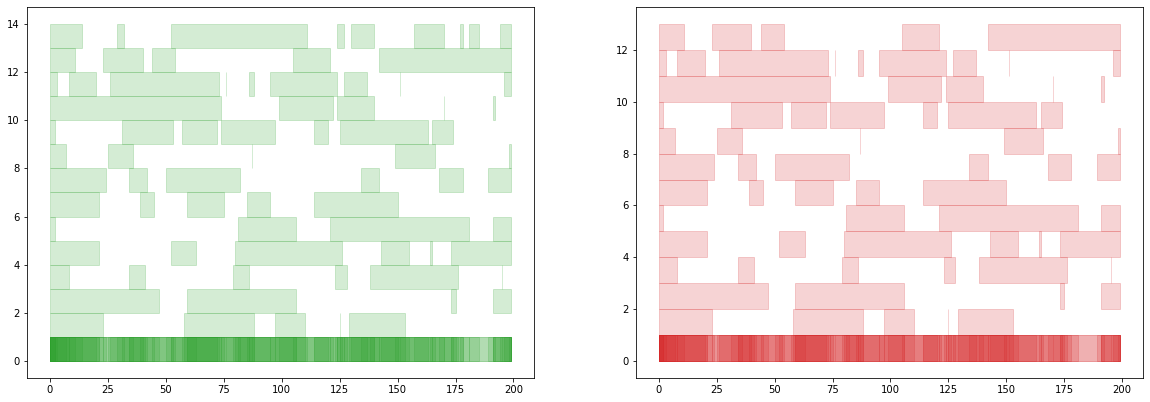

In [63]:
# Génération de la disponibilité des sites
STATES = [1]*X  # état initial des sites
DISPO = [STATES]
for gen in range(T-1) :
    state = np.array(alea(DISPO[gen])).T
    DISPO = DISPO + [state]
visualisation_site()

#### 4. *Programme principal*

In [109]:
list_iter = []

for iter in range(NITER) :
    list_n = [N0]  # Liste des effectifs de la population sur chaque site à chaque pas de temps
    disp = []  # Liste des tailles du pool de migrants

    for gen in range(T-1) :
        n_plus = dynamique_inter(list_n[gen])
        n_plus[0] = np.array([n_plus[0].T[e]*DISPO[gen] for e in range(E)]).T
        list_n = list_n + [n_plus[0]]
        disp = disp + [n_plus[1]]

    list_n = np.array(list_n).T  # Données regroupées par espèce plutôt que par pas de temps
    disp = np.array(disp).T
    list_iter = list_iter + [list_n]

list_iter = np.array(list_iter)
mean_iter = np.mean(list_iter, axis=0)
sd_iter = np.std(list_iter, axis=0)
min_iter = np.amin(list_iter, axis=0)
max_iter = np.amax(list_iter, axis=0)

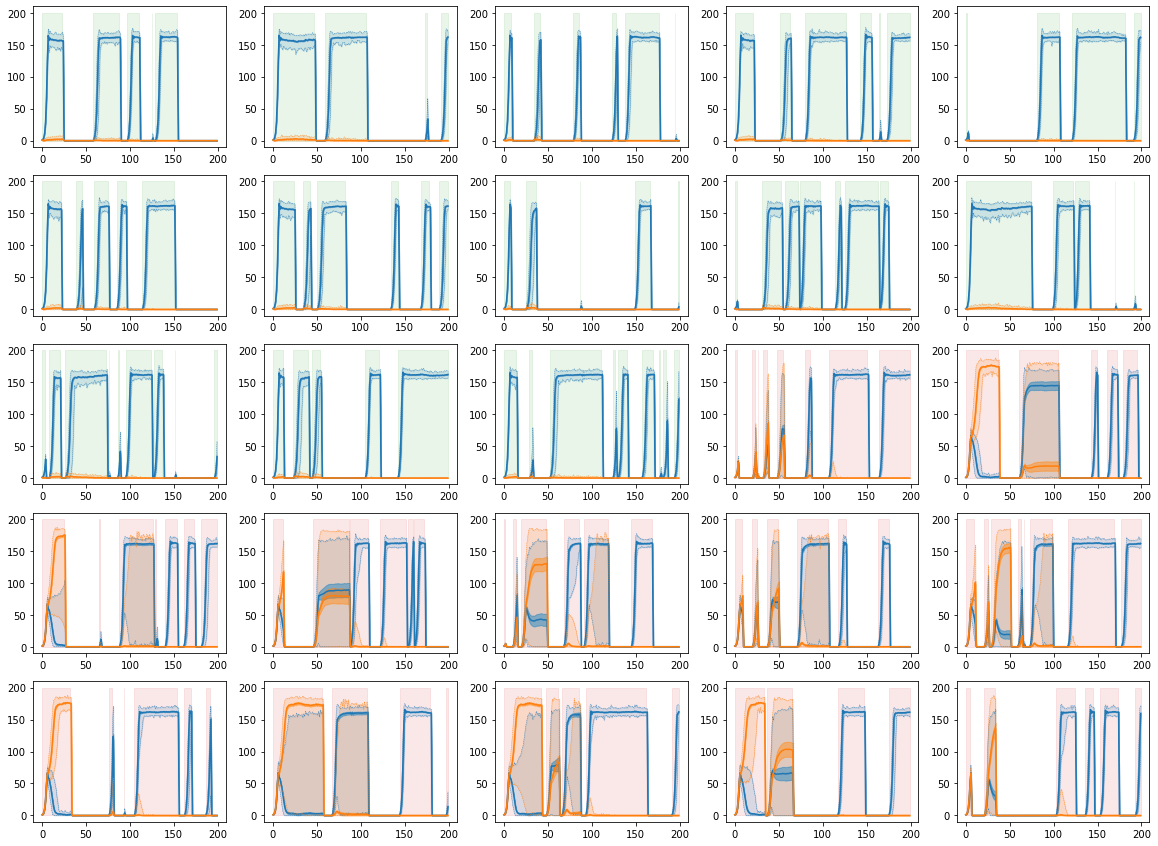

In [89]:
visualisation_dyna(mean_iter, sd_iter, min_iter, max_iter)

### 5. Test de l'effet des paramètres

#### 1. *Valeurs initiales des paramètres*

In [94]:
# Variables globales
NITER = 100  # Nombre d'itérations
T = 200  # Nombre de pas de temps
X = 25  # Nombre de sites
E = 2  # Nombre d'espèces
H = 2  # Nombre de ressources

PALL = 0.05  # probabilité d'allumage d'un site éteint au temps t
PEXT = 0.05  # probilité d'extinction d'un site allumé au temps t

# Variables liées aux espèces
# Génération des effectifs initiaux
N0 = np.array([[1]*E]*X)  # Effect initial réparti de façon homogène
#N0 = np.array([np.random.multinomial(X, [1/X]*X) for i in range(E)]).T  # Effectif initial réparti aléatoirement

R = [2]*E  # Taux de croissance maximal
MU = [0.1]*E  # Taux de mortalité
A_INTRA = 1
A_INTER = 1
D = [0.1]*E  # Taux de dispersion
C = [0.5]*E  # Taux de mortalité lors de la dispersion

# Variables liées à l'exploitation des ressources (E = 3, H = 2)
K0 = 200
SP = [1, 0]
GE = 0.9

#### 2. *Fonctions*

In [ ]:
def alea(v) :
    """ Fonction de sélection aléatoire des sites disponibles au temps t+1
    
    Paramètres
    ----------
    v : list
        Statut des sites au temps t (0 ou 1)
    
    Return
    ------
    list
        Statut des sites au temps t+1 (0 ou 1)
    
    """

    all_t = [i for i in range(len(v)) if v[i]==1]
    ext_t = [i for i in range(len(v)) if v[i]==0]

    all_tplus = random.sample(ext_t, np.random.binomial(len(ext_t), PALL))
    ext_tplus = random.sample(all_t, np.random.binomial(len(all_t), PEXT))

    for i in all_tplus :
        v[i] = 1
    for i in ext_tplus :
        v[i] = 0
    
    return v
def interaction(n, a, i) :
    """ Fonction d'interaction d'une espèce i parmi R espèces

    Cette fonction calcule le membre 'somme(alpha_{ij}*N_j)' de l'équation de compétition de Lotka-Volterra pour l'espèce i

    Paramètres
    ----------
    n : liste de taille R
        Effectifs des R espèces
    a : array de taille R*R
        Matrice des coefficients d'interaction entre les R espèces
    i : int
        Identifiant de l'espèce d'intérêt
    
    Return
    ------
    float
        somme(alpha_{ij}*N_j)
    
    """
    alpha = a[i]  # Sélection des coefficients d'interaction de l'espèce i avec les R espèces
    inter = n*alpha  # alpha_{ij}*N_j
    return sum(inter)
def reproduction(n, a, i, x) :
    """ Fonction de croissance d'une espèce en compétition avec d'autres sur une génération

    Cette fonction calcule l'effectif après reproduction d'une population suivant une croissance logistique, en compétition
    de Lotka-Volterra avec d'autres espèces

    Paramètres
    ----------
    n : list
        Effectif des espèces au temps t
    i : int
        Identifiant de l'espèce d'intérêt
    
    Return
    ------
    int
        Effectif de la population après reproduction et mortalité au temps t
    
    """
    n = list(n[x])
    if K[x][i]==0 :
        return 0
    else :
        return int((n[i] + n[i]*R[i]*(1-(interaction(n, a, i)/K[x][i])))*(1-MU[i]))
def dynamique_intra(n, x) :
    """ Fonction de dynamique de R espèces sur une génération à l'intérieur d'un site x

    Cette fonction calcule l'effectif à la génération suivante pour R espèces suivant une croissance logistique
    sur un site x, avec de la dispersion entre les X sites

    Paramètres
    ----------
    n : int
        Effectif de la population au temps t au site x
    x : int
        Identifiant du site x
    
    Return
    ------
    array de taille 2
        Effectif de chaque espèce après reproduction et dispersion, et nombre de migrants issus du site x
    
    """
    nb = np.array([reproduction(n, A, i, x) for i in range(E)])  # Effectif après reproduction
    nb[nb < 0] = 0
    d = np.array([int(D[i]*nb[i]) for i in range(E)])

    return [nb-d,d]
def effectif(n) : 
    """ Fonction de tri des effectif des espèces

    Cette fonction traite les données inssues de la fonction dynamique_intra et regroupe d'une part les effectifs de 
    chaque espèce dans chaque site dans une matrice R*X, et d'autre part les pools de migrant de chaque espèce dans une liste

    Paramètres
    ----------
    n : array de taille X*R*2
        Effectif de chaque espèces et migrants issus de chaque site
    
    Return
    ------
    list(array, list)
        Liste avec la matrice des effectifs de chaque espèce dans chaque site, et la liste des pools de migrant de chaque espèce
    
    """
    site = np.array([n[x][0] for x in range(X)])
    pool = np.array([n[x][1] for x in range(X)])
    pool = list(np.sum(pool,0))
    return list([site, pool])
def migration(m, i) :
    """ Fonction de migration d'une espèce i entre X sites

    Cette fonction répartit selon une distribution multinomiale un pool de migrants entre X sites

    Paramètres
    ----------
    m : int
        Pool de migrants
    
    Return
    ------
    list
        Effectifs de migrants dans chacun des sites
    
    """
    m = m[i] - int(m[i]*C[i])  # Application du taux de mortalité pendant la dispersion
    return np.random.multinomial(m, [1/X]*X)
def dynamique_inter(n) :
    """ Fonction de dynamique d'une population sur une génération entre plusieurs sites

    Cette fonction calcule l'effectif à la génération suivante d'une population suivant une croissance logistique
    sur plusieurs sites, avec de la dispersion entre les sites

    Paramètres
    ----------
    n : list
        Effectif de la population sur chaque site au temps t
    
    Return
    ------
    array de taille 2
        Effectif de la population après reproduction et dispersion dans chaque site, et nombre de migrants de chaque espèce
    
    """
    intra = np.array([dynamique_intra(n, x) for x in range(X)])  # Calcul des effectifs et des migrants de chaque site
    eff = effectif(intra)  # Tri des effectifs
    d = eff[1]  # Sélection des pools de migrants
    mig = np.array([migration(d,i) for i in range(E)]).T  # Répartition des migrants entre les sites
    n_plus = eff[0]+ mig  # Effectifs de chaque espèce dans chaque site à la fin de la génération
    return [n_plus, d]
def visualisation_dyna(mean, sd, min, max) :
    """ Fonction de visualisation de la dynamique de R espèces dans X sites
    Cette fonction crée une figure permettant de visualiser les résultats de dynamique_inter 
    
    Paramètres
    ----------
    a : list
        Effectifs de chaque espèce sur chaque site pour T générations
    
    Return
    ------
    figure
    
    """
    palette = sns.color_palette(None, H+E)  # Palette pour le fond des graphes

    site_res = []
    for h in range(H) :
        site_res = site_res + [i for i in range(X) if RES_X[i]==h]  # Tri des sites par ressource
    
    f = math.ceil(math.sqrt(X))  # Taille de la figure : f*f
    fig = plt.figure(1, figsize=(20,15))
    
    for x in range(X) :
        ax = fig.add_subplot(f,f,x+1)
        #[i.set_linewidth(2) for i in ax.spines.values()]
        #[spine.set_edgecolor(palette[RES_X[x]]) for spine in ax.spines.values()]
        ax.fill_between(range(T), 0, K0, where=(np.array(DISPO).T[site_res[x]]==1), color=palette[RES_X[site_res[x]]+E], alpha=0.10)
        for i in range(E):
            ci95 = 1.96 * sd[i][site_res[x]]/np.sqrt(NITER)
            a = mean[i][site_res[x]]-ci95
            b = mean[i][site_res[x]]+ci95
            a[a < 0] = 0
            b[b > K0] = K0
            ax.fill_between(range(T), a, b, color='white', alpha=1)
        for i in range(E):
            ax.fill_between(range(T), min[i][site_res[x]], max[i][site_res[x]], color=palette[i], alpha=0.15)

        for i in range(E):
            ci95 = 1.96 * sd[i][site_res[x]]/np.sqrt(NITER)
            a = mean[i][site_res[x]]-ci95
            b = mean[i][site_res[x]]+ci95
            a[a < 0] = 0
            b[b > K0] = K0
            ax.fill_between(range(T), a, b, color=palette[i], alpha=0.5)
            ax.plot(mean[i][site_res[x]], color = palette[i])
            ax.plot(min[i][site_res[x]],'--', lw = 0.4, color = palette[i])
            ax.plot(max[i][site_res[x]],'--', lw = 0.4, color = palette[i])
    plt.show()
def feeding(e, h) :
    """ Fonction de défintion du régime alimentaire des E espèces
    
    Paramètres
    ----------
    p : integer
        nombre souhaitée d'espèces généralistes

    h : integer
        nombre maximum de ressources exploitées par des spécialistes (h<H)
    
    Return
    ------
    list
        Statut des status des espèces (généraliste, spécialiste de la ressource h1, ...) et ressource spécialisée
    
    """
    n_gen = e
    n_spe = E - n_gen
    conso = []
    feed = []
    
    for i in range(n_gen) :
        conso = conso + [[GE]*H]
        feed = feed + [0]
    rep_spec = np.random.multinomial(n_spe, [1/h]*h)
    res = H - len(rep_spec)
    for i in range(len(rep_spec)) :
        spe = [SP[1]]*H
        spe[res+i] = SP[0]
        for j in range(rep_spec[i]) :
            conso = conso + [spe]
            feed = feed + [res+i+1]
    conso = np.array(conso).T
    return list([conso, feed])
def visualisation_site() :
    """ Fonction de visualisation de la disponiblité des sites par ressource
    Cette fonction crée une figure permettant de visualiser la disponibilté des sites regroupés en fonction de leur ressource 
    
    Paramètres
    ----------
    
    Return
    ------
    figure
    
    """
    palette = sns.color_palette(None, H+E)  # Palette pour le fond des graphes

    site_res = []
    for h in range(H) :
        site_res = site_res + [i for i in range(X) if RES_X[i]==h]  # Tri des sites par ressource
    
    f = math.ceil(math.sqrt(H))  # Taille de la figure : f*f
    fig = plt.figure(1, figsize=(20,15))
    
    for h in range(H) :
        ax = fig.add_subplot(f,f,h+1)
        #[i.set_linewidth(2) for i in ax.spines.values()]
        #[spine.set_edgecolor(palette[RES_X[x]]) for spine in ax.spines.values()]
        
        ax.fill_between(range(T), 0, 1, color='red', alpha=1)  # Identifier périodes où ressource absente
        for x in range(RES_X.count(h)) :
            ax.fill_between(range(T), 0, 1, where=(np.array(DISPO).T[site_res[x]]==1), color='white', alpha=1)
        
        for x in range(RES_X.count(h)) :
            ax.fill_between(range(T), 0, 1, where=(np.array(DISPO).T[site_res[x]]==1), color=palette[h+E], alpha=0.2)
            ax.fill_between(range(T), 1+x, 2+x, where=(np.array(DISPO).T[site_res[x]]==1), color=palette[h+E], alpha=0.2)
        
    plt.show()

In [155]:
def visualisation_mean_pop_totale(n, value) :
    """ Fonction de visualisation de la dynamique de la population totale moyenne pour un set de paramètre sur N_ITER répétitions
    
    Paramètres
    ----------
    n : array
        Array des effectifs totaux moyens aux T pas de temps pour N_ITER répétitions
    
    Return
    ------
    figure
    
    """
    palette = sns.color_palette(None, H+E)
    f = math.ceil(math.sqrt(len(value)))  # Taille de la figure : f*f
    fig1 = plt.figure(1, figsize=(20,15))
    fig2 = plt.figure(2, figsize=(20,15))
    ref = np.mean(n[0], axis = 0)
    for val in range(len(value)) :
        mean = np.mean(n[val], axis = 0)
        rel = np.divide(mean, ref)
        sd = np.std(n[val], axis = 0)
        min_tot = np.amin(n[val], axis = 0)
        max_tot = np.amax(n[val], axis = 0)
        ci95 = 1.96 * sd/np.sqrt(NITER)
        a = mean-ci95
        a[a < 0] = 0
        b = mean+ci95
        b[b > X*K0] = X*K0
        ax1 = fig1.add_subplot(f,f,val+1)
        ax1.set_title(value[val])
        ax2 = fig2.add_subplot(f,f,val+1)
        ax2.set_ylim([0, 1.1])
        ax2.set_title(value[val])
        for i in range(E):
            ax1.fill_between(range(T), min_tot[i], max_tot[i], color=palette[i], alpha=0.15)
            ax1.fill_between(range(T), a[i], b[i], color=palette[i], alpha=0.5)
            ax1.plot(mean[i], color = palette[i])
            ax2.plot(rel[i], color = palette[i])
        
    plt.show(fig1)
    plt.show(fig2)

def modif_variable(var, value) :
    """ Fonction de modification d'une variable globale dans un intervalle de valeurs
    
    Paramètres
    ----------
    var : str
        Variable à modifier
    
    value : list
        Valeurs à tester
    
    Return
    ------
    figure
    
    """
    list_tot_pop = []

    for val in range(len(value)) :
        globals()[var] = value[val]

        A = np.array([[A_INTER]*E]*E)
        for i in range(E) :
            A[i,i] = A_INTRA
        globals()['A'] = A


        CONSO = feeding(E-int(E/2), int(H/2))  # Détermination du régime alimentaire des espèces
        print('Traitement de la valeur ' + str(val+1)+ ' : ' + str(value[val]))
        EXP = CONSO[0]  # Coefficients d'exploitation des ressources
        RES = np.array([[K0]*E]*H) * EXP  # Capacité d'accueil des ressources
        K = [RES[RES_X[x]] for x in range(X)]  # Capacité d'accueil du site pour chaque espèce

        list_iter = []

        for iter in range(NITER) :
            list_n = [N0]  # Liste des effectifs de la population sur chaque site à chaque pas de temps
            disp = []  # Liste des tailles du pool de migrants

            for gen in range(T-1) :
                n_plus = dynamique_inter(list_n[gen])
                n_plus[0] = np.array([n_plus[0].T[e]*DISPO[gen] for e in range(E)]).T
                list_n = list_n + [n_plus[0]]
                disp = disp + [n_plus[1]]

            list_n = np.array(list_n).T  # Données regroupées par espèce plutôt que par pas de temps
            disp = np.array(disp).T
            list_iter = list_iter + [list_n]

        list_iter = np.array(list_iter)
        mean_iter = np.mean(list_iter, axis=0)
        sd_iter = np.std(list_iter, axis=0)
        min_iter = np.amin(list_iter, axis=0)
        max_iter = np.amax(list_iter, axis=0)

        #visualisation_dyna(mean_iter, sd_iter, min_iter, max_iter)

        pop_tot_iter = np.sum(list_iter, axis = 2)
        list_tot_pop = list_tot_pop + [pop_tot_iter]

    return(list_tot_pop)


#### 3. *Génération des sites (fixes pour chaque test)*

In [47]:
RES_X = [random.randrange(H) for x in range(X)]  # Ressource présente dans chaque site
print([RES_X.count(h) for h in range(H)])

[13, 12]


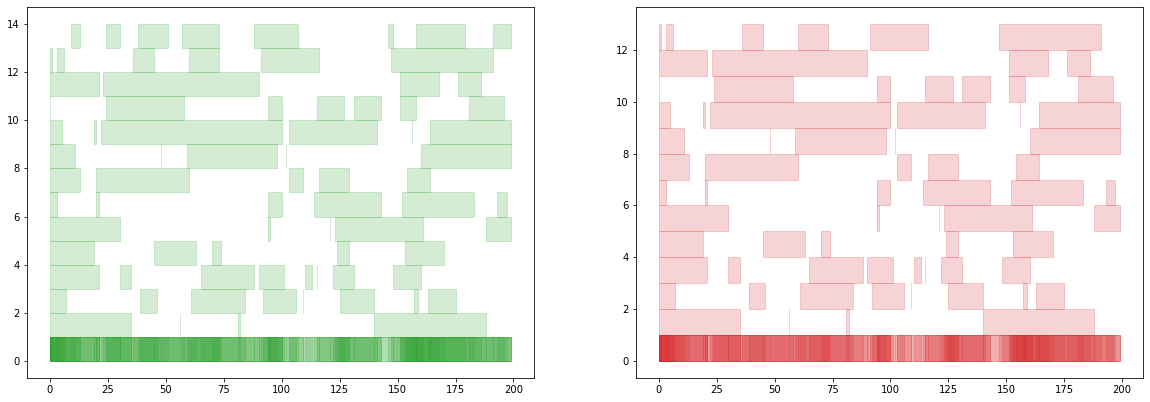

In [49]:
# Génération de la disponibilité des sites
STATES = [1]*X  # état initial des sites
DISPO = [STATES]
for gen in range(T-1) :
    state = np.array(alea(DISPO[gen])).T
    DISPO = DISPO + [state]
visualisation_site()

#### 4. *Programme principal*

Traitement de la valeur 0 : 0.0
Traitement de la valeur 1 : 1.0
Traitement de la valeur 2 : 2.0


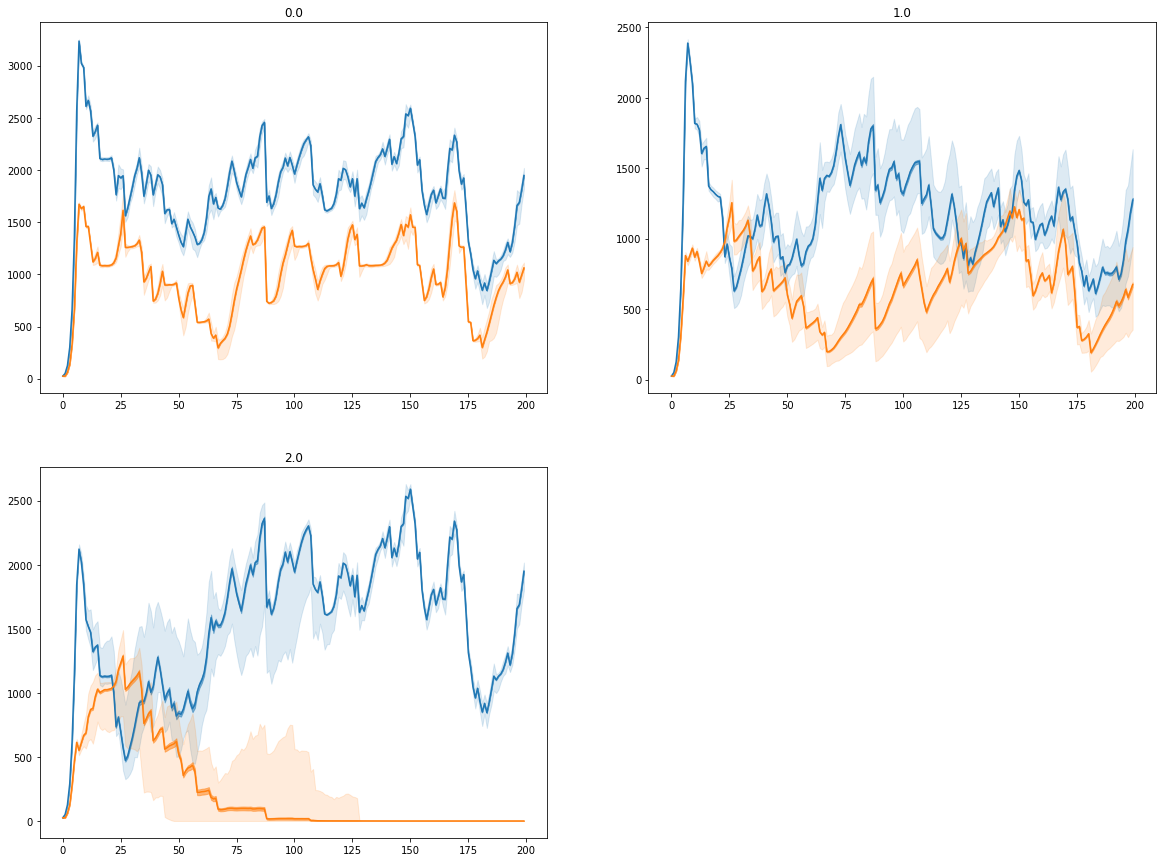

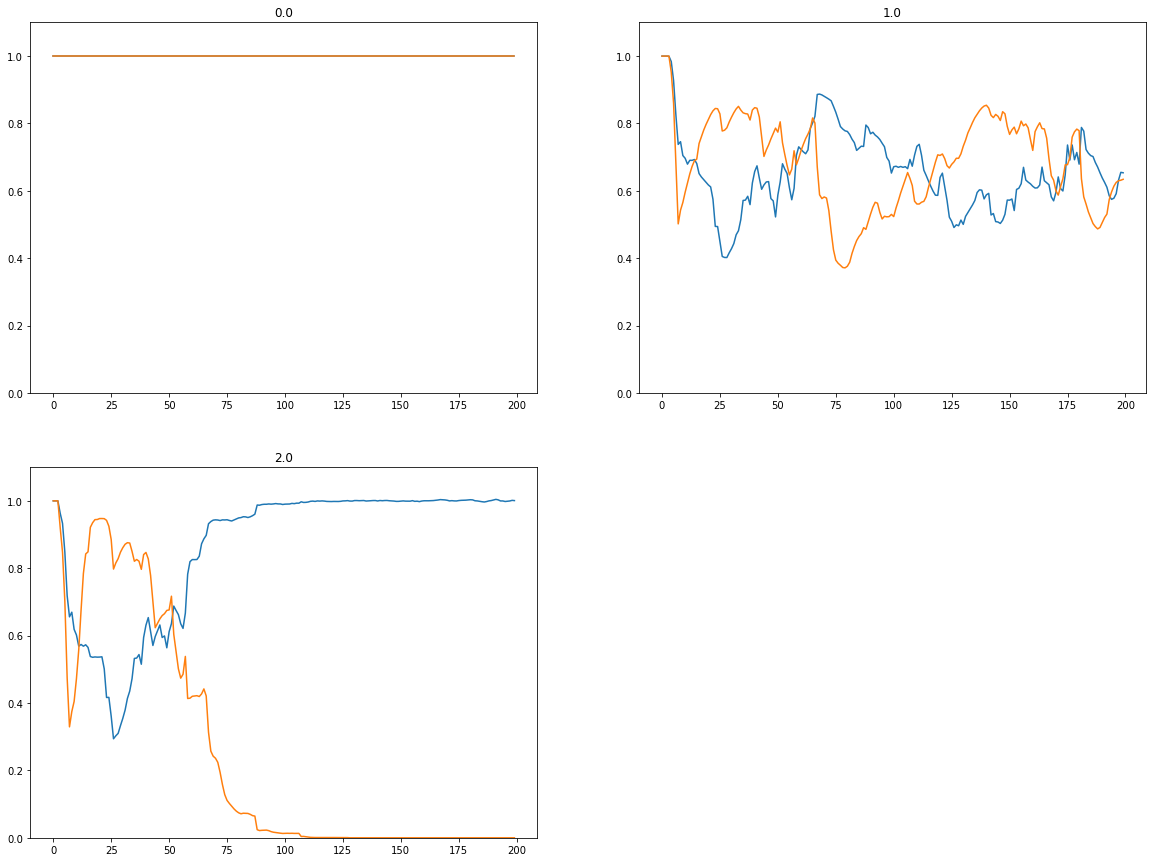

In [156]:
n_value = modif_variable('A_INTER', np.linspace(0,2,3))
visualisation_mean_pop_totale(n_value, np.linspace(0,2,3))

### 6. Généralisation pour plusieurs plannings possibles

#### 1. *Valeurs initiales des paramètres*

In [92]:
# Variables globales
NITER = 20  # Nombre d'itérations
T = 100  # Nombre de pas de temps
X = 36  # Nombre de sites
E = 2  # Nombre d'espèces
H = 2  # Nombre de ressources

PALL = 0.05  # probabilité d'allumage d'un site éteint au temps t
PEXT = 0.05  # probilité d'extinction d'un site allumé au temps t

# Variables liées aux espèces
# Génération des effectifs initiaux
N0X = 1
#N0 = np.array([np.random.multinomial(X, [1/X]*X) for i in range(E)]).T  # Effectif initial réparti aléatoirement

R = [2]*E  # Taux de croissance maximal
MU = [0.1]*E  # Taux de mortalité
A_INTRA = 1
A_INTER = 1.5
D = [0.1]*E  # Taux de dispersion
C = [0.5]*E  # Taux de mortalité lors de la dispersion

# Variables liées à l'exploitation des ressources (E = 3, H = 2)
K0 = 200
SP = [1, 0]
GE = 0.9

#### 2. *Fonctions*

In [3]:
def alea(v) :
    """ Fonction de sélection aléatoire des sites disponibles au temps t+1
    
    Paramètres
    ----------
    v : list
        Statut des sites au temps t (0 ou 1)
    
    Return
    ------
    list
        Statut des sites au temps t+1 (0 ou 1)
    
    """

    all_t = [i for i in range(len(v)) if v[i]==1]
    ext_t = [i for i in range(len(v)) if v[i]==0]

    all_tplus = random.sample(ext_t, np.random.binomial(len(ext_t), PALL))
    ext_tplus = random.sample(all_t, np.random.binomial(len(all_t), PEXT))

    for i in all_tplus :
        v[i] = 1
    for i in ext_tplus :
        v[i] = 0
    
    return v
def interaction(n, a, i) :
    """ Fonction d'interaction d'une espèce i parmi R espèces

    Cette fonction calcule le membre 'somme(alpha_{ij}*N_j)' de l'équation de compétition de Lotka-Volterra pour l'espèce i

    Paramètres
    ----------
    n : liste de taille R
        Effectifs des R espèces
    a : array de taille R*R
        Matrice des coefficients d'interaction entre les R espèces
    i : int
        Identifiant de l'espèce d'intérêt
    
    Return
    ------
    float
        somme(alpha_{ij}*N_j)
    
    """
    alpha = a[i]  # Sélection des coefficients d'interaction de l'espèce i avec les R espèces
    inter = n*alpha  # alpha_{ij}*N_j
    return sum(inter)
def reproduction(n, a, i, x) :
    """ Fonction de croissance d'une espèce en compétition avec d'autres sur une génération

    Cette fonction calcule l'effectif après reproduction d'une population suivant une croissance logistique, en compétition
    de Lotka-Volterra avec d'autres espèces

    Paramètres
    ----------
    n : list
        Effectif des espèces au temps t
    i : int
        Identifiant de l'espèce d'intérêt
    
    Return
    ------
    int
        Effectif de la population après reproduction et mortalité au temps t
    
    """
    n = list(n[x])
    if K[x][i]==0 :
        return 0
    else :
        return int((n[i] + n[i]*R[i]*(1-(interaction(n, a, i)/K[x][i])))*(1-MU[i]))
def dynamique_intra(n, x) :
    """ Fonction de dynamique de R espèces sur une génération à l'intérieur d'un site x

    Cette fonction calcule l'effectif à la génération suivante pour R espèces suivant une croissance logistique
    sur un site x, avec de la dispersion entre les X sites

    Paramètres
    ----------
    n : int
        Effectif de la population au temps t au site x
    x : int
        Identifiant du site x
    
    Return
    ------
    array de taille 2
        Effectif de chaque espèce après reproduction et dispersion, et nombre de migrants issus du site x
    
    """
    nb = np.array([reproduction(n, A, i, x) for i in range(E)])  # Effectif après reproduction
    nb[nb < 0] = 0
    d = np.array([int(D[i]*nb[i]) for i in range(E)])

    return [nb-d,d]
def effectif(n) : 
    """ Fonction de tri des effectif des espèces

    Cette fonction traite les données inssues de la fonction dynamique_intra et regroupe d'une part les effectifs de 
    chaque espèce dans chaque site dans une matrice R*X, et d'autre part les pools de migrant de chaque espèce dans une liste

    Paramètres
    ----------
    n : array de taille X*R*2
        Effectif de chaque espèces et migrants issus de chaque site
    
    Return
    ------
    list(array, list)
        Liste avec la matrice des effectifs de chaque espèce dans chaque site, et la liste des pools de migrant de chaque espèce
    
    """
    site = np.array([n[x][0] for x in range(X)])
    pool = np.array([n[x][1] for x in range(X)])
    pool = list(np.sum(pool,0))
    return list([site, pool])
def migration(m, i) :
    """ Fonction de migration d'une espèce i entre X sites

    Cette fonction répartit selon une distribution multinomiale un pool de migrants entre X sites

    Paramètres
    ----------
    m : int
        Pool de migrants
    
    Return
    ------
    list
        Effectifs de migrants dans chacun des sites
    
    """
    m = m[i] - int(m[i]*C[i])  # Application du taux de mortalité pendant la dispersion
    return np.random.multinomial(m, [1/X]*X)
def dynamique_inter(n) :
    """ Fonction de dynamique d'une population sur une génération entre plusieurs sites

    Cette fonction calcule l'effectif à la génération suivante d'une population suivant une croissance logistique
    sur plusieurs sites, avec de la dispersion entre les sites

    Paramètres
    ----------
    n : list
        Effectif de la population sur chaque site au temps t
    
    Return
    ------
    array de taille 2
        Effectif de la population après reproduction et dispersion dans chaque site, et nombre de migrants de chaque espèce
    
    """
    intra = np.array([dynamique_intra(n, x) for x in range(X)])  # Calcul des effectifs et des migrants de chaque site
    eff = effectif(intra)  # Tri des effectifs
    d = eff[1]  # Sélection des pools de migrants
    mig = np.array([migration(d,i) for i in range(E)]).T  # Répartition des migrants entre les sites
    n_plus = eff[0]+ mig  # Effectifs de chaque espèce dans chaque site à la fin de la génération
    return [n_plus, d]
def visualisation_dyna(mean, sd, min, max) :
    """ Fonction de visualisation de la dynamique de R espèces dans X sites
    Cette fonction crée une figure permettant de visualiser les résultats de dynamique_inter 
    
    Paramètres
    ----------
    a : list
        Effectifs de chaque espèce sur chaque site pour T générations
    
    Return
    ------
    figure
    
    """
    palette = sns.color_palette(None, H+E)  # Palette pour le fond des graphes

    site_res = []
    for h in range(H) :
        site_res = site_res + [i for i in range(X) if RES_X[i]==h]  # Tri des sites par ressource
    
    f = math.ceil(math.sqrt(X))  # Taille de la figure : f*f
    fig = plt.figure(1, figsize=(20,15))
    
    for x in range(X) :
        ax = fig.add_subplot(f,f,x+1)
        #[i.set_linewidth(2) for i in ax.spines.values()]
        #[spine.set_edgecolor(palette[RES_X[x]]) for spine in ax.spines.values()]
        ax.fill_between(range(T), 0, K0, where=(np.array(DISPO).T[site_res[x]]==1), color=palette[RES_X[site_res[x]]+E], alpha=0.10)
        for i in range(E):
            ci95 = 1.96 * sd[i][site_res[x]]/np.sqrt(NITER)
            a = mean[i][site_res[x]]-ci95
            b = mean[i][site_res[x]]+ci95
            a[a < 0] = 0
            b[b > K0] = K0
            ax.fill_between(range(T), a, b, color='white', alpha=1)
        for i in range(E):
            ax.fill_between(range(T), min[i][site_res[x]], max[i][site_res[x]], color=palette[i], alpha=0.15)

        for i in range(E):
            ci95 = 1.96 * sd[i][site_res[x]]/np.sqrt(NITER)
            a = mean[i][site_res[x]]-ci95
            b = mean[i][site_res[x]]+ci95
            a[a < 0] = 0
            b[b > K0] = K0
            ax.fill_between(range(T), a, b, color=palette[i], alpha=0.5)
            ax.plot(mean[i][site_res[x]], color = palette[i])
            ax.plot(min[i][site_res[x]],'--', lw = 0.4, color = palette[i])
            ax.plot(max[i][site_res[x]],'--', lw = 0.4, color = palette[i])
    plt.show()
def feeding(e, h) :
    """ Fonction de défintion du régime alimentaire des E espèces
    
    Paramètres
    ----------
    p : integer
        nombre souhaitée d'espèces généralistes

    h : integer
        nombre maximum de ressources exploitées par des spécialistes (h<H)
    
    Return
    ------
    list
        Statut des status des espèces (généraliste, spécialiste de la ressource h1, ...) et ressource spécialisée
    
    """
    n_gen = e
    n_spe = E - n_gen
    conso = []
    feed = []
    
    for i in range(n_gen) :
        conso = conso + [[GE]*H]
        feed = feed + [0]
    rep_spec = np.random.multinomial(n_spe, [1/h]*h)
    res = H - len(rep_spec)
    for i in range(len(rep_spec)) :
        spe = [SP[1]]*H
        spe[res+i] = SP[0]
        for j in range(rep_spec[i]) :
            conso = conso + [spe]
            feed = feed + [res+i+1]
    conso = np.array(conso).T
    return list([conso, feed])
def visualisation_site() :
    """ Fonction de visualisation de la disponiblité des sites par ressource
    Cette fonction crée une figure permettant de visualiser la disponibilté des sites regroupés en fonction de leur ressource 
    
    Paramètres
    ----------
    
    Return
    ------
    figure
    
    """
    palette = sns.color_palette(None, H+E)  # Palette pour le fond des graphes

    site_res = []
    for h in range(H) :
        site_res = site_res + [i for i in range(X) if RES_X[i]==h]  # Tri des sites par ressource
    
    f = math.ceil(math.sqrt(H))  # Taille de la figure : f*f
    fig = plt.figure(1, figsize=(20,15))
    
    count1 = 0
    count2 = 0
    for h in range(H) :
        ax = fig.add_subplot(f,f,h+1)
        #[i.set_linewidth(2) for i in ax.spines.values()]
        #[spine.set_edgecolor(palette[RES_X[x]]) for spine in ax.spines.values()]
        
        ax.fill_between(range(T), 0, 1, color='red', alpha=1)  # Identifier périodes où ressource absente
        for x in range(RES_X.count(h)) :
            ax.fill_between(range(T), 0, 1, where=(np.array(DISPO).T[site_res[count1]]==1), color='white', alpha=1)
            count1 = count1 + 1
        
        for x in range(RES_X.count(h)) :
            ax.fill_between(range(T), 0, 1, where=(np.array(DISPO).T[site_res[count2]]==1), color=palette[h+E], alpha=0.2)
            ax.fill_between(range(T), 1+x, 2+x, where=(np.array(DISPO).T[site_res[count2]]==1), color=palette[h+E], alpha=0.2)
            count2 = count2 + 1
        
    plt.show()
def visualisation_mean_pop_totale(n, value) :
    """ Fonction de visualisation de la dynamique de la population totale moyenne pour un set de paramètre sur N_ITER répétitions
    
    Paramètres
    ----------
    n : array
        Array des effectifs totaux moyens aux T pas de temps pour N_ITER répétitions
    
    Return
    ------
    figure
    
    """
    palette = sns.color_palette(None, H+E)
    f = math.ceil(math.sqrt(len(value)))  # Taille de la figure : f*f
    fig1 = plt.figure(1, figsize=(20,15))
    fig2 = plt.figure(2, figsize=(20,15))
    ref = np.mean(n[0], axis = 0)
    for val in range(len(value)) :
        mean = np.mean(n[val], axis = 0)
        rel = np.divide(mean, ref)
        sd = np.std(n[val], axis = 0)
        min_tot = np.amin(n[val], axis = 0)
        max_tot = np.amax(n[val], axis = 0)
        ci95 = 1.96 * sd/np.sqrt(NITER)
        a = mean-ci95
        a[a < 0] = 0
        b = mean+ci95
        b[b > X*K0] = X*K0
        ax1 = fig1.add_subplot(f,f,val+1)
        ax1.set_title(value[val])
        ax2 = fig2.add_subplot(f,f,val+1)
        ax2.set_ylim([0, 1.1])
        ax2.set_title(value[val])
        for i in range(E):
            ax1.fill_between(range(T), min_tot[i], max_tot[i], color=palette[i], alpha=0.15)
            ax1.fill_between(range(T), a[i], b[i], color=palette[i], alpha=0.5)
            ax1.plot(mean[i], color = palette[i])
            ax2.plot(rel[i], color = palette[i])
        
    plt.show(fig1)
    plt.show(fig2)
def modif_variable(var, value) :
    """ Fonction de modification d'une variable globale dans un intervalle de valeurs
    
    Paramètres
    ----------
    var : str
        Variable à modifier
    
    value : list
        Valeurs à tester
    
    Return
    ------
    figure
    
    """
    list_tot_pop = []

    for val in range(len(value)) :
        globals()[var] = value[val]

        A = np.array([[A_INTER]*E]*E)
        for i in range(E) :
            A[i,i] = A_INTRA
        globals()['A'] = A

        print('Traitement de la valeur ' + str(val+1)+ ' : ' + str(value[val]))
        list_iter = []

        for iter in range(NITER) :
            list_n = [N0]  # Liste des effectifs de la population sur chaque site à chaque pas de temps
            disp = []  # Liste des tailles du pool de migrants

            for gen in range(T-1) :
                n_plus = dynamique_inter(list_n[gen])
                n_plus[0] = np.array([n_plus[0].T[e]*DISPO[gen] for e in range(E)]).T
                list_n = list_n + [n_plus[0]]
                disp = disp + [n_plus[1]]

            list_n = np.array(list_n).T  # Données regroupées par espèce plutôt que par pas de temps
            disp = np.array(disp).T
            list_iter = list_iter + [list_n]

        list_iter = np.array(list_iter)
        mean_iter = np.mean(list_iter, axis=0)
        sd_iter = np.std(list_iter, axis=0)
        min_iter = np.amin(list_iter, axis=0)
        max_iter = np.amax(list_iter, axis=0)

        #visualisation_dyna(mean_iter, sd_iter, min_iter, max_iter)

        pop_tot_iter = np.sum(list_iter, axis = 2)
        list_tot_pop = list_tot_pop + [pop_tot_iter]

    return(list_tot_pop)

In [5]:
def visualisation_global(n, value) :
    """ Fonction de visualisation de la dynamique de la population totale moyenne pour un set de paramètre sur N_ITER répétitions
    pour n_iter_site disponibilités différentes
    
    Paramètres
    ----------
    n : array
        Array des effectifs totaux moyens aux T pas de temps pour N_ITER répétitions pour n_iter_site disponibilités
    
    Return
    ------
    figure
    
    """
    palette = sns.color_palette(None, H+E)
    f = math.ceil(math.sqrt(len(value)))  # Taille de la figure : f*f
    fig1 = plt.figure(1, figsize=(20,15))
    fig2 = plt.figure(2, figsize=(20,15))
    ref = np.mean(np.mean(n[0], axis = 1), axis = 0)
    for val in range(len(value)) :
        mean = np.mean(np.mean(n[val], axis = 1), axis = 0)
        rel = np.divide(mean, ref)
        sd = np.std(np.mean(n[val], axis = 1), axis = 0)
        min_tot = np.amin(np.mean(n[val], axis = 1), axis = 0)
        max_tot = np.amax(np.mean(n[val], axis = 1), axis = 0)
        ci95 = 1.96 * sd/np.sqrt(NITER)
        a = mean-ci95
        a[a < 0] = 0
        b = mean+ci95
        b[b > X*K0] = X*K0
        ax1 = fig1.add_subplot(f,f,val+1)
        ax1.set_title(value[val])
        ax2 = fig2.add_subplot(f,f,val+1)
        ax2.set_ylim([0, 1.1])
        ax2.set_title(value[val])
        for i in range(E):
            ax1.fill_between(range(T), min_tot[i], max_tot[i], color=palette[i], alpha=0.15)
            ax1.fill_between(range(T), a[i], b[i], color=palette[i], alpha=0.5)
            ax1.plot(mean[i], color = palette[i])
            ax2.plot(rel[i], color = palette[i])
        
    plt.show(fig1)
    plt.show(fig2)

def modif_variable_iter_site(var, value, site) :
    """ Fonction de modification d'une variable globale dans un intervalle de valeurs
    
    Paramètres
    ----------
    var : str
        Variable à modifier
    
    value : list
        Valeurs à tester
    
    Return
    ------
    figure
    
    """
    list_tot_pop = []

    for val in range(len(value)) :
        globals()[var] = value[val]

        N0 = np.array([[N0X]*E]*X)  # Effect initial réparti de façon homogène
        globals()['N0'] = N0

        A = np.array([[A_INTER]*E]*E)
        for i in range(E) :
            A[i,i] = A_INTRA
        globals()['A'] = A

        print('Traitement de la valeur ' + str(val+1)+ ' : ' + str(value[val]))

        list_tot_pop_iter_site = []
        for s in range(N_ITER_SITE) :
            print('Traitement du planning '+str(s+1))
            globals()['DISPO'] = site[s]

            list_iter = []

            for iter in range(NITER) :
                list_n = [N0]  # Liste des effectifs de la population sur chaque site à chaque pas de temps
                disp = []  # Liste des tailles du pool de migrants

                for gen in range(T-1) :
                    n_plus = dynamique_inter(list_n[gen])
                    n_plus[0] = np.array([n_plus[0].T[e]*DISPO[gen] for e in range(E)]).T
                    list_n = list_n + [n_plus[0]]
                    disp = disp + [n_plus[1]]

                list_n = np.array(list_n).T  # Données regroupées par espèce plutôt que par pas de temps
                disp = np.array(disp).T
                list_iter = list_iter + [list_n]

            list_iter = np.array(list_iter)
            mean_iter = np.mean(list_iter, axis=0)
            sd_iter = np.std(list_iter, axis=0)
            min_iter = np.amin(list_iter, axis=0)
            max_iter = np.amax(list_iter, axis=0)

            #visualisation_dyna(mean_iter, sd_iter, min_iter, max_iter)

            pop_tot_iter = np.sum(list_iter, axis = 2)
            list_tot_pop_iter_site = list_tot_pop_iter_site + [pop_tot_iter]
        list_tot_pop = list_tot_pop + [list_tot_pop_iter_site]

    return(list_tot_pop)

#### 3. *Programme principal*

In [93]:
random.seed(2)
RES_X = [random.randrange(H) for x in range(X)]  # Ressource présente dans chaque site
print([RES_X.count(h) for h in range(H)])

CONSO = feeding(E-int(E/2), int(H/2))  # Détermination du régime alimentaire des espèces
print(CONSO[1])
EXP = CONSO[0]  # Coefficients d'exploitation des ressources
RES = np.array([[K0]*E]*H) * EXP  # Capacité d'accueil des ressources
K = [RES[RES_X[x]] for x in range(X)]  # Capacité d'accueil du site pour chaque espèce

[18, 18]
[0, 2]


In [96]:
random.seed(1)
N_ITER_SITE = 20

liste_dispo = []
for s in range(N_ITER_SITE) :
    STATES = [random.randint(0,1) for i in range(X)]  # état initial des sites
    DISPO = [STATES]
    for gen in range(T-1) :
       state = np.array(alea(DISPO[gen])).T
       DISPO = DISPO + [state]
    #print('Planning ' + str(s+1))
    #visualisation_site()
    liste_dispo = liste_dispo + [DISPO]

Traitement de la valeur 1 : 0.0
Traitement du planning 1
Traitement du planning 2
Traitement du planning 3
Traitement du planning 4
Traitement du planning 5
Traitement du planning 6
Traitement du planning 7
Traitement du planning 8
Traitement du planning 9
Traitement du planning 10
Traitement du planning 11
Traitement du planning 12
Traitement du planning 13
Traitement du planning 14
Traitement du planning 15
Traitement du planning 16
Traitement du planning 17
Traitement du planning 18
Traitement du planning 19
Traitement du planning 20
Traitement de la valeur 2 : 0.5
Traitement du planning 1
Traitement du planning 2
Traitement du planning 3
Traitement du planning 4
Traitement du planning 5
Traitement du planning 6
Traitement du planning 7
Traitement du planning 8
Traitement du planning 9
Traitement du planning 10
Traitement du planning 11
Traitement du planning 12
Traitement du planning 13
Traitement du planning 14
Traitement du planning 15
Traitement du planning 16
Traitement du plan

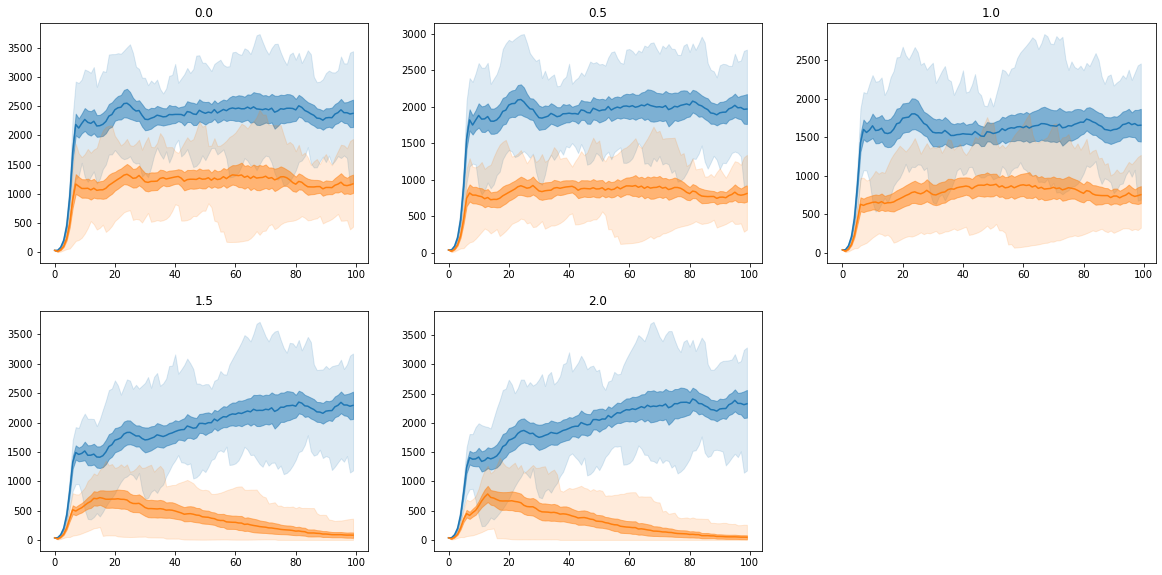

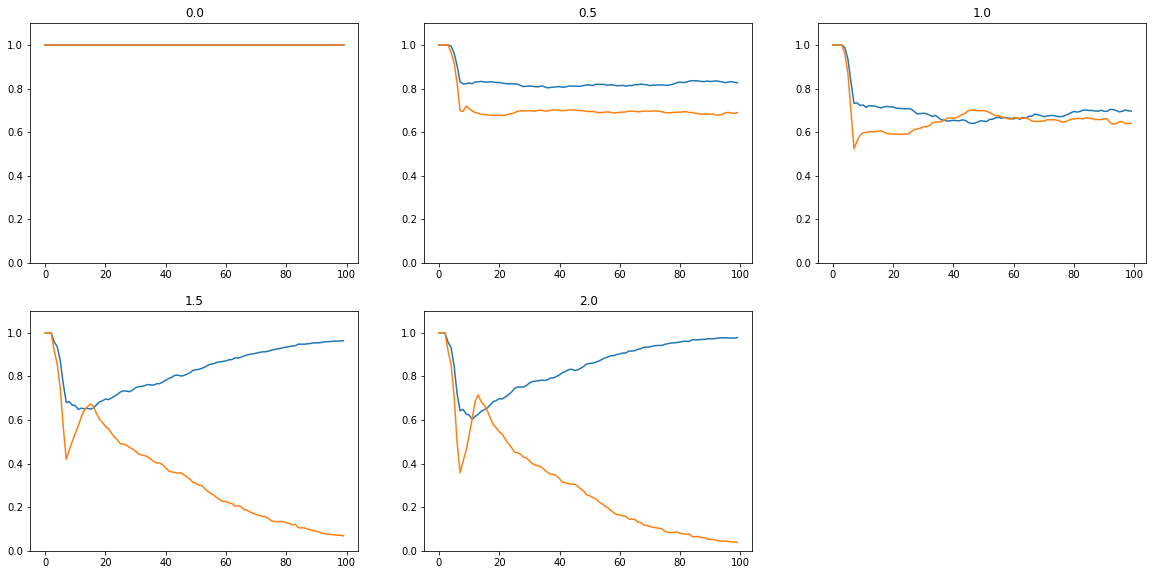

In [162]:
liste_iter_site = modif_variable_iter_site('A_INTER', np.linspace(0,2,5), liste_dispo)

visualisation_global(liste_iter_site, np.linspace(0,2,5))

Test : A_INTER différent pour 2 espèces

In [129]:
def visualisation_global_test(n, value) :
    """ Fonction de visualisation de la dynamique de la population totale moyenne pour un set de paramètre sur N_ITER répétitions
    pour n_iter_site disponibilités différentes
    
    Paramètres
    ----------
    n : array
        Array des effectifs totaux moyens aux T pas de temps pour N_ITER répétitions pour n_iter_site disponibilités
    
    Return
    ------
    figure
    
    """
    palette = sns.color_palette(None, H+E)
    f =len(value)  # Taille de la figure : f*f
    fig1 = plt.figure(1, figsize=(20,15))
    fig2 = plt.figure(2, figsize=(20,15))
    ref = np.array([np.array([(1-MU[0])*(1-D[0])*GE*K0*X/4]*T),np.array([(1-MU[1])*(1-D[1])*SP[0]*K0*X/4]*T)])
    for val1 in range(len(value)) :
        for val2 in range(len(value)) :
            val = val1*len(value) + val2
            mean = np.mean(np.mean(n[val], axis = 1), axis = 0)
            sd = np.std(np.mean(n[val], axis = 1), axis = 0)
            min_tot = np.amin(np.mean(n[val], axis = 1), axis = 0)
            max_tot = np.amax(np.mean(n[val], axis = 1), axis = 0)
            ci95 = 1.96 * sd/np.sqrt(NITER)
            a = mean-ci95
            a[a < 0] = 0
            b = mean+ci95
            b[b > X*K0] = X*K0
            ax1 = fig1.add_subplot(f,f,val+1)
            ax1.set_title(value[val2])
            ax2 = fig2.add_subplot(f,f,val+1)
            ax2.set_ylim([0, 1.1])
            ax2.set_title(value[val2])
            for i in range(E):
                rel = np.divide(mean[i], ref[i])
                ax1.fill_between(range(T), min_tot[i], max_tot[i], color=palette[i], alpha=0.15)
                ax1.fill_between(range(T), a[i], b[i], color=palette[i], alpha=0.5)
                ax1.plot(mean[i], color = palette[i])
                ax2.plot(rel, color = palette[i])
        
    plt.show(fig1)
    plt.show(fig2)

def modif_variable_iter_site_test(value, site) :
    """ Fonction de modification d'une variable globale dans un intervalle de valeurs
    
    Paramètres
    ----------
    var : str
        Variable à modifier
    
    value : list
        Valeurs à tester
    
    Return
    ------
    figure
    
    """
    list_tot_pop_res1 = []
    list_tot_pop_res2 = []

    N0 = np.array([[N0X]*E]*X)  # Effect initial réparti de façon homogène
    globals()['N0'] = N0

    N0_res1 = np.array([N0[i] for i in range(X) if RES_X[i]==0])
    N0_res2 = np.array([N0[i] for i in range(X) if RES_X[i]==1])

    for val1 in range(len(value)) :
        for val2 in range(len(value)) :

            A = np.array([[1.0]*E]*E)
            A[0,1] = value[val1]
            A[1,0] = value[val2]
            globals()['A'] = A

            print('Traitement de la matrice ')
            print(A)

            list_tot_pop_iter_site_res1 = []
            list_tot_pop_iter_site_res2 = []


            for s in range(N_ITER_SITE) :
                print('Traitement du planning '+str(s+1))
                globals()['DISPO'] = site[s]

                list_iter_res1 = []
                list_iter_res2 = []

                for iter in range(NITER) :
                    list_n = [N0]
                    list_n_res1 = [N0_res1]  # Liste des effectifs de la population sur chaque site à chaque pas de temps
                    list_n_res2 = [N0_res2]

                    for gen in range(T-1) :
                        n_plus = dynamique_inter(list_n[gen])[0]
                        n_plus = np.array([n_plus.T[e]*DISPO[gen] for e in range(E)])
                        n_plus = n_plus.T
                        n_plus_res1 = np.array([n_plus[i] for i in range(X) if RES_X[i]==0])
                        n_plus_res2 = np.array([n_plus[i] for i in range(X) if RES_X[i]==1])
                        list_n_res1 = list_n_res1 + [n_plus_res1]
                        list_n_res2 = list_n_res2 + [n_plus_res2]
                        
                        list_n = list_n + [n_plus]

                    list_n_res1 = np.array(list_n_res1).T
                    list_n_res2 = np.array(list_n_res2).T
                    list_iter_res1 = list_iter_res1 + [list_n_res1]
                    list_iter_res2 = list_iter_res2 + [list_n_res2]

                list_iter_res1 = np.array(list_iter_res1)
                list_iter_res2 = np.array(list_iter_res2)

                #visualisation_dyna(mean_iter, sd_iter, min_iter, max_iter)

                pop_tot_iter_res1 = np.sum(list_iter_res1, axis = 2)
                pop_tot_iter_res2 = np.sum(list_iter_res2, axis = 2)

                list_tot_pop_iter_site_res1 = list_tot_pop_iter_site_res1 + [pop_tot_iter_res1]
                list_tot_pop_iter_site_res2 = list_tot_pop_iter_site_res2 + [pop_tot_iter_res2]

            list_tot_pop_res1 = list_tot_pop_res1 + [list_tot_pop_iter_site_res1]
            list_tot_pop_res2 = list_tot_pop_res2 + [list_tot_pop_iter_site_res2]

    return([np.array(list_tot_pop_res1), np.array(list_tot_pop_res2)])

In [130]:
a_inter = np.linspace(0,2,5)

liste_iter_site = modif_variable_iter_site_test(a_inter, liste_dispo)


Traitement de la matrice 
[[1. 0.]
 [0. 1.]]
Traitement du planning 1
Traitement du planning 2
Traitement du planning 3
Traitement du planning 4
Traitement du planning 5
Traitement du planning 6
Traitement du planning 7
Traitement du planning 8
Traitement du planning 9
Traitement du planning 10
Traitement du planning 11
Traitement du planning 12
Traitement du planning 13
Traitement du planning 14
Traitement du planning 15
Traitement du planning 16
Traitement du planning 17
Traitement du planning 18
Traitement du planning 19
Traitement du planning 20
Traitement de la matrice 
[[1.  0. ]
 [0.5 1. ]]
Traitement du planning 1
Traitement du planning 2
Traitement du planning 3
Traitement du planning 4
Traitement du planning 5
Traitement du planning 6
Traitement du planning 7
Traitement du planning 8
Traitement du planning 9
Traitement du planning 10
Traitement du planning 11
Traitement du planning 12
Traitement du planning 13
Traitement du planning 14
Traitement du planning 15
Traitement du 

KeyboardInterrupt: 

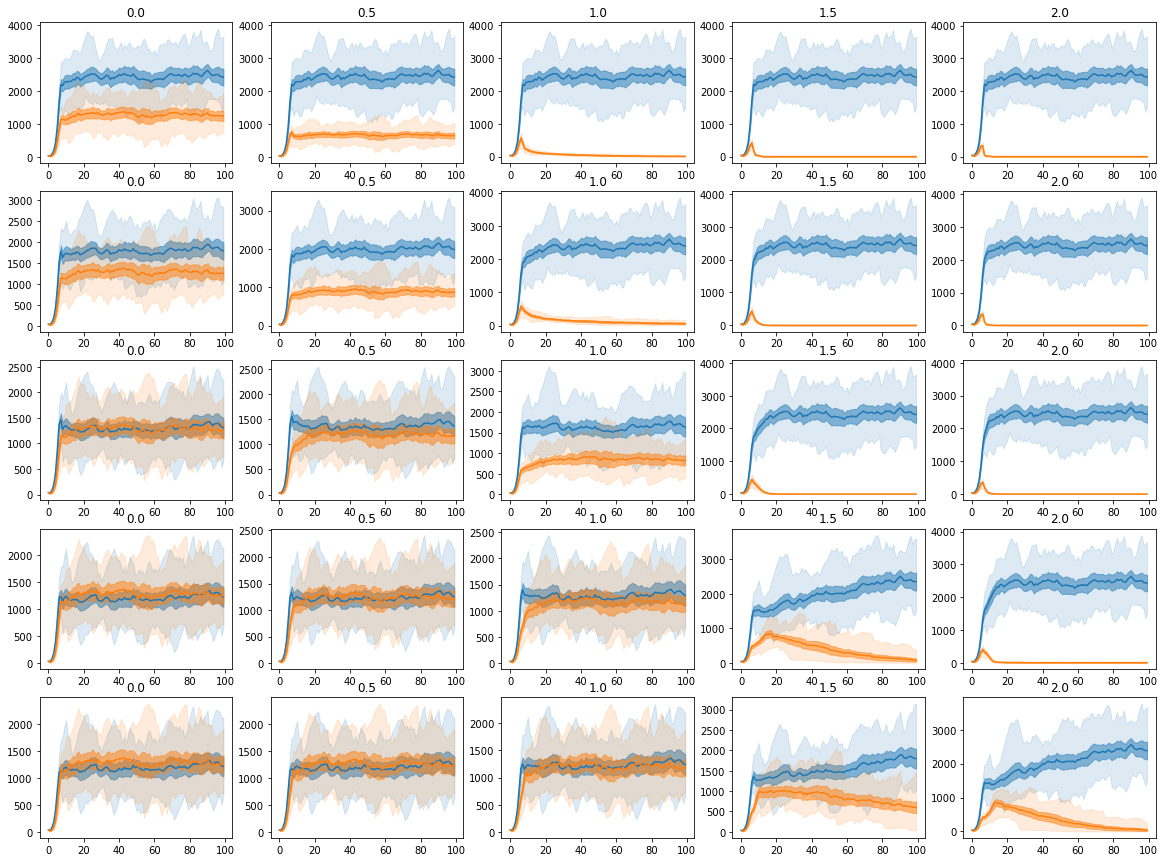

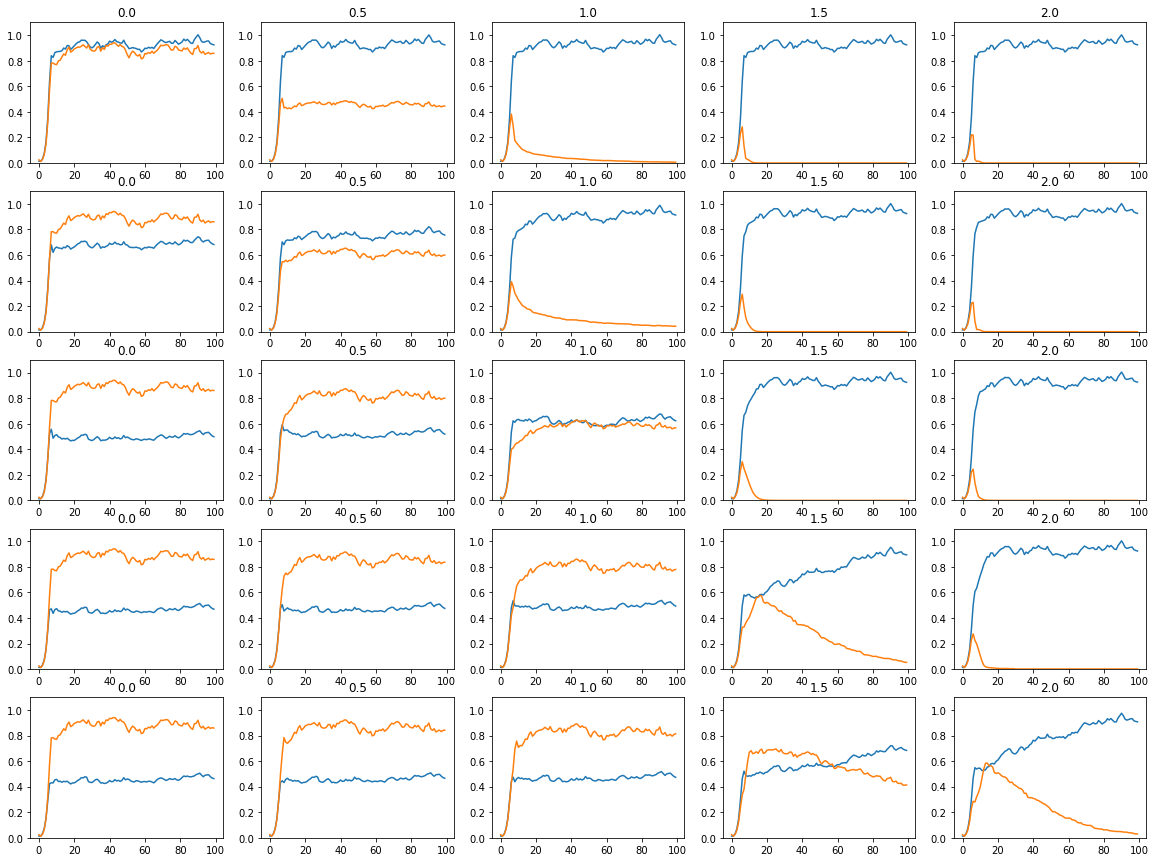

In [69]:
visualisation_global_test(liste_iter_site[0], a_inter)

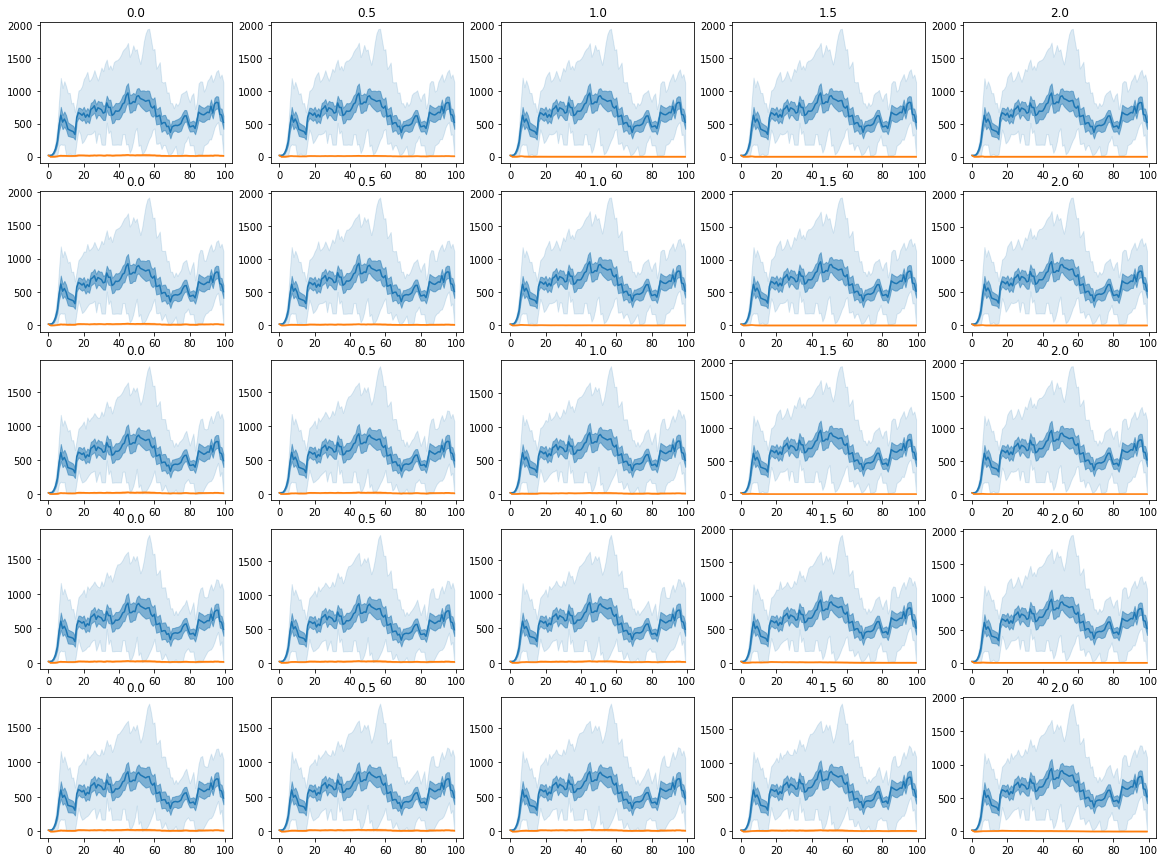

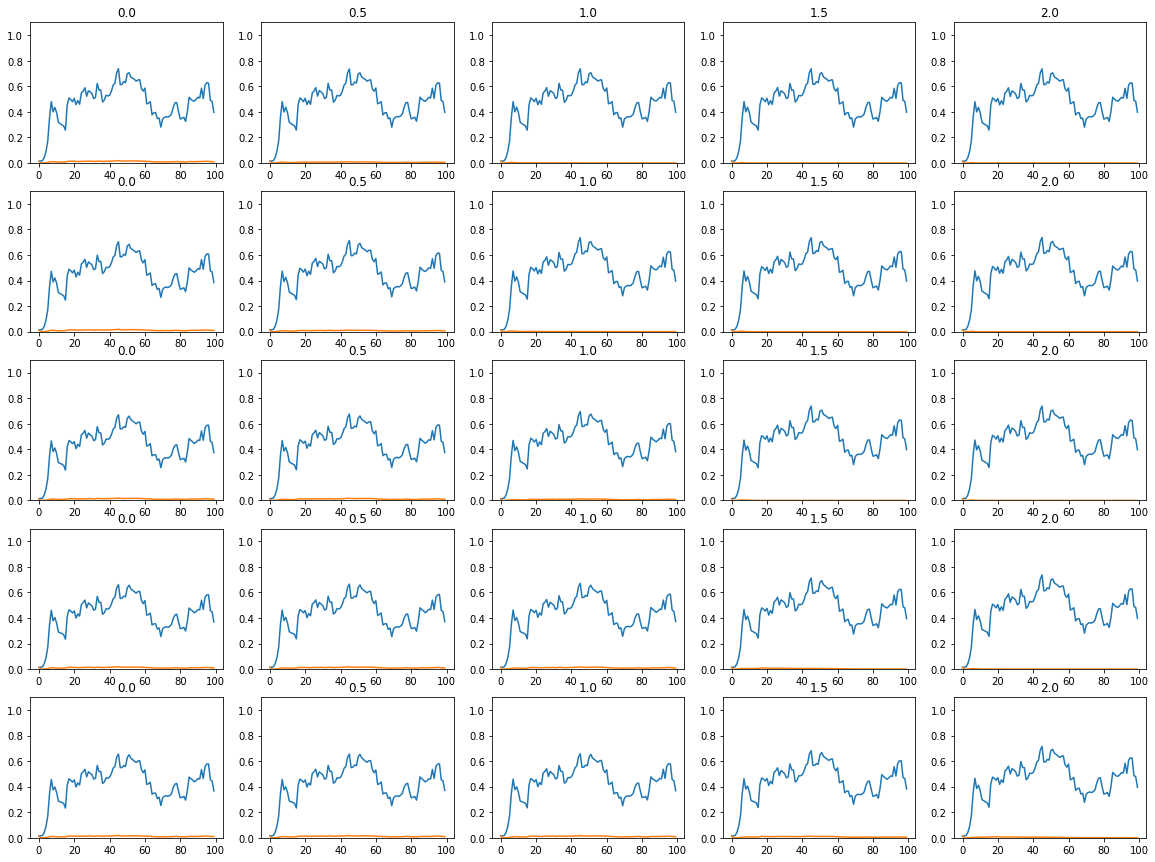

In [71]:
visualisation_global_test(liste_iter_site[1], a_inter)

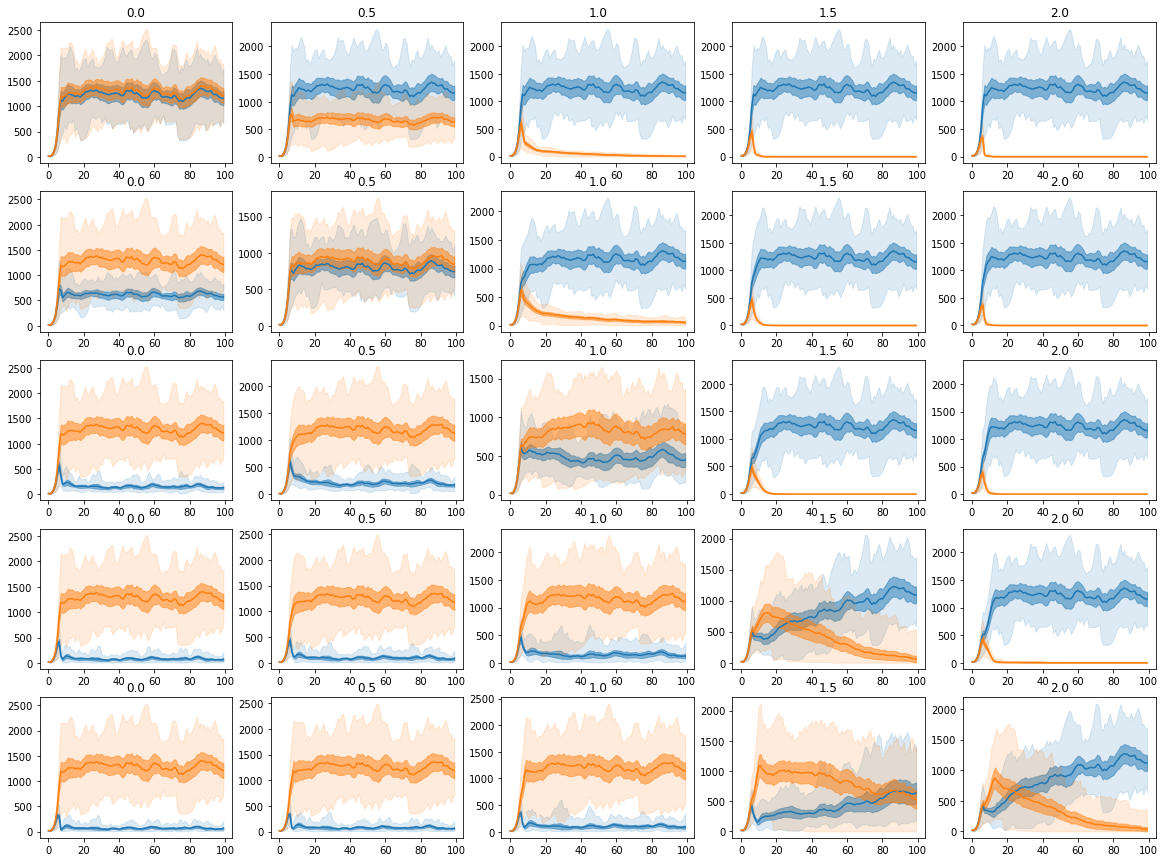

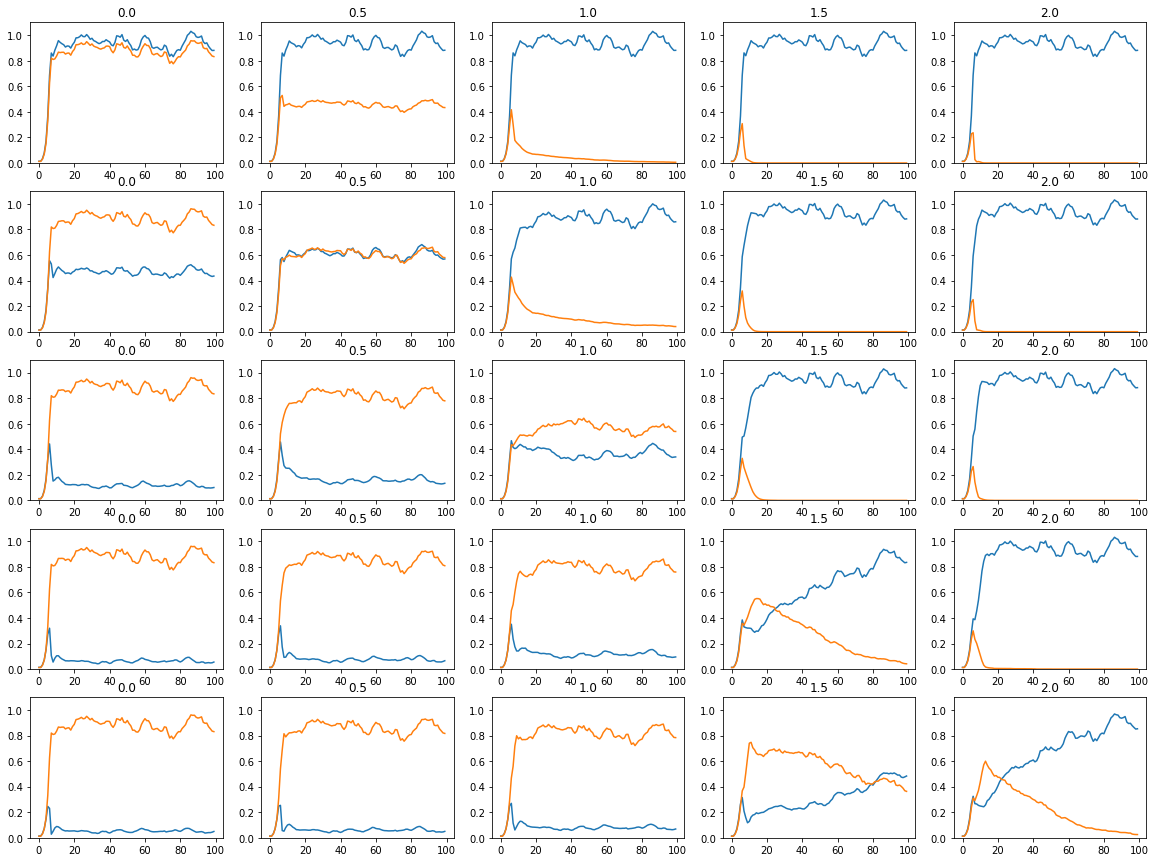

In [99]:
visualisation_global_test(liste_iter_site[2], a_inter)

In [127]:
def visualisation_ratio_generaliste(n, value, dispo) :
    """ Fonction de visualisation de la dynamique de la population totale moyenne pour un set de paramètre sur N_ITER répétitions
    pour n_iter_site disponibilités différentes
    
    Paramètres
    ----------
    n : array
        Array des effectifs totaux moyens aux T pas de temps pour N_ITER répétitions pour n_iter_site disponibilités
    
    Return
    ------
    figure
    
    """
    n_res1 = n[0]
    n_res2 = n[1]
    n_tot = n[0] + n[1]

    dispo = np.array(dispo)
    mean_dispo = np.mean(dispo, axis = 0)
    disp_res1 = np.sum(np.array([np.array(mean_dispo).T[i] for i in range(X) if RES_X[i]==0]), axis=0)
    disp_res2 = np.sum(np.array([np.array(mean_dispo).T[i] for i in range(X) if RES_X[i]==0]), axis=0)

    palette = sns.color_palette(None, H+E)
    f =len(value)  # Taille de la figure : f*f
    fig1 = plt.figure(1, figsize=(20,15))
    fig1.suptitle("Dynamique globale")
    fig2 = plt.figure(2, figsize=(20,15))
    fig2.suptitle("Dynamique dans la ressource 1")
    fig3 = plt.figure(3, figsize=(20,15))
    fig3.suptitle("Dynamique dans la ressource 2")
    fig4 = plt.figure(4, figsize=(20,15))
    fig4.suptitle("Ratio des abondances du généraliste dans les deux ressources")
    for val1 in range(len(value)) :
        for val2 in range(len(value)) :
            val = val1*len(value) + val2
            mean = np.mean(np.mean(n_tot[val], axis = 1), axis = 0)
            sd = np.std(np.mean(n_tot[val], axis = 1), axis = 0)
            min_tot = np.amin(np.mean(n_tot[val], axis = 1), axis = 0)
            max_tot = np.amax(np.mean(n_tot[val], axis = 1), axis = 0)
            ci95 = 1.96 * sd/np.sqrt(NITER)
            a = mean-ci95
            a[a < 0] = 0
            b = mean+ci95
            b[b > X*K0] = X*K0

            mean1 = np.mean(np.mean(n_res1[val], axis = 1), axis = 0)
            sd1 = np.std(np.mean(n_res1[val], axis = 1), axis = 0)
            min_tot1 = np.amin(np.mean(n_res1[val], axis = 1), axis = 0)
            max_tot1 = np.amax(np.mean(n_res1[val], axis = 1), axis = 0)
            ci951 = 1.96 * sd1/np.sqrt(NITER)
            a1 = mean1-ci951
            a1[a1 < 0] = 0
            b1 = mean1+ci951
            b1[b1 > X*K0] = X*K0

            mean2 = np.mean(np.mean(n_res2[val], axis = 1), axis = 0)
            sd2 = np.std(np.mean(n_res2[val], axis = 1), axis = 0)
            min_tot2 = np.amin(np.mean(n_res2[val], axis = 1), axis = 0)
            max_tot2 = np.amax(np.mean(n_res2[val], axis = 1), axis = 0)
            ci952 = 1.96 * sd2/np.sqrt(NITER)
            a2 = mean2-ci952
            a2[a1 < 0] = 0
            b2 = mean2+ci952
            b2[b2 > X*K0] = X*K0

            ax1 = fig1.add_subplot(f,f,val+1)
            ax1.set_title(value[val2])
            ax2 = fig2.add_subplot(f,f,val+1)
            ax2.set_title(value[val2])
            ax3 = fig3.add_subplot(f,f,val+1)
            ax3.set_title(value[val2])
            ax4 = fig4.add_subplot(f,f,val+1)
            ax4.set_title(value[val2])
            ax4.set_ylim([0, 1.1])
            for i in range(E):
                ax1.fill_between(range(T), min_tot[i], max_tot[i], color=palette[i], alpha=0.15)
                ax1.fill_between(range(T), a[i], b[i], color=palette[i], alpha=0.5)
                ax1.plot(mean[i], color = palette[i])

                ax2.fill_between(range(T), min_tot1[i], max_tot1[i], color=palette[i], alpha=0.15)
                ax2.fill_between(range(T), a1[i], b1[i], color=palette[i], alpha=0.5)
                ax2.plot(mean1[i], color = palette[i])

                ax3.fill_between(range(T), min_tot2[i], max_tot2[i], color=palette[i], alpha=0.15)
                ax3.fill_between(range(T), a2[i], b2[i], color=palette[i], alpha=0.5)
                ax3.plot(mean2[i], color = palette[i])

            occ_res1 = np.divide(mean1[0], disp_res1)
            occ_res2 = np.divide(mean2[0], disp_res2)
            ratio = np.divide(occ_res2, occ_res1)    
            ax4.plot(ratio, color = palette[0])
        
    plt.show(fig1)
    plt.show(fig2)
    plt.show(fig3)
    plt.show(fig4)

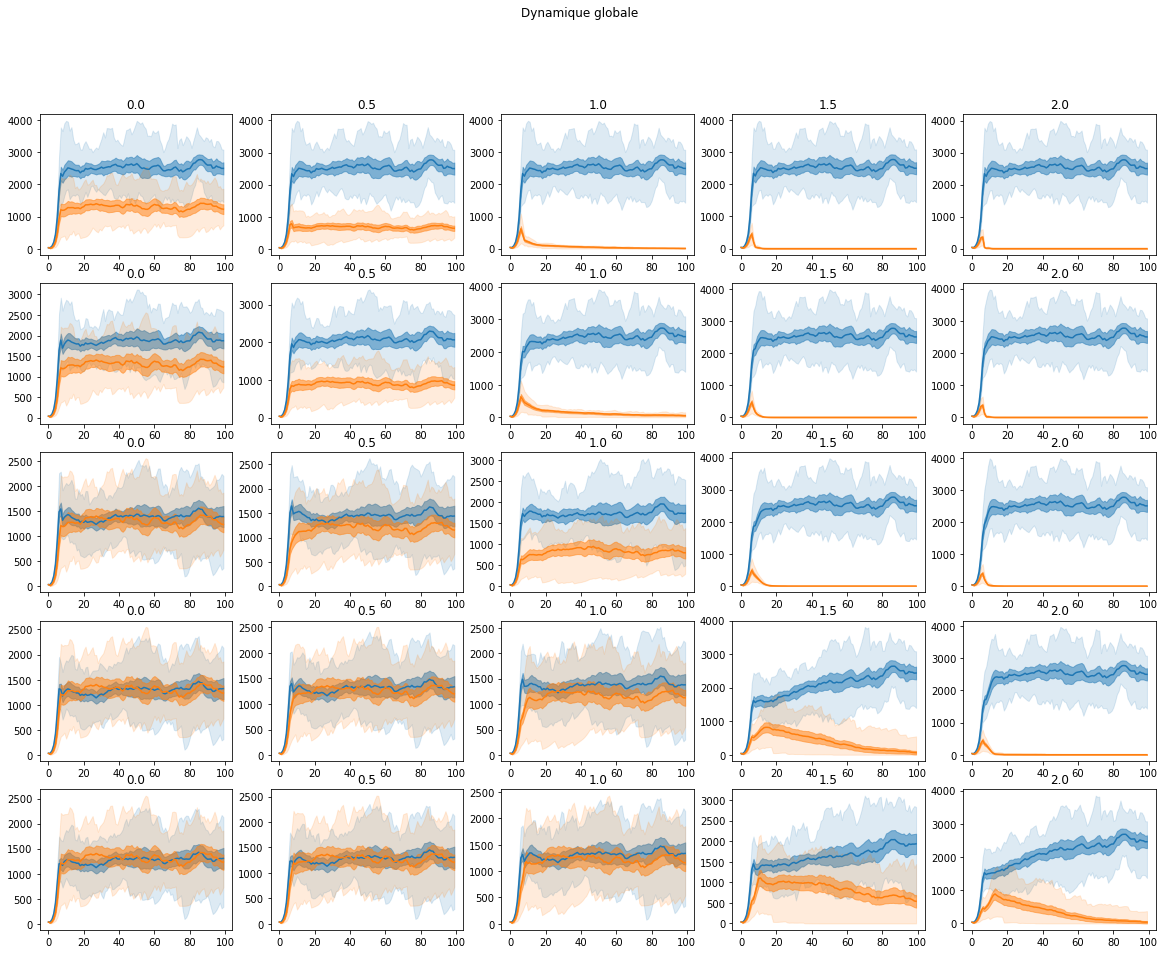

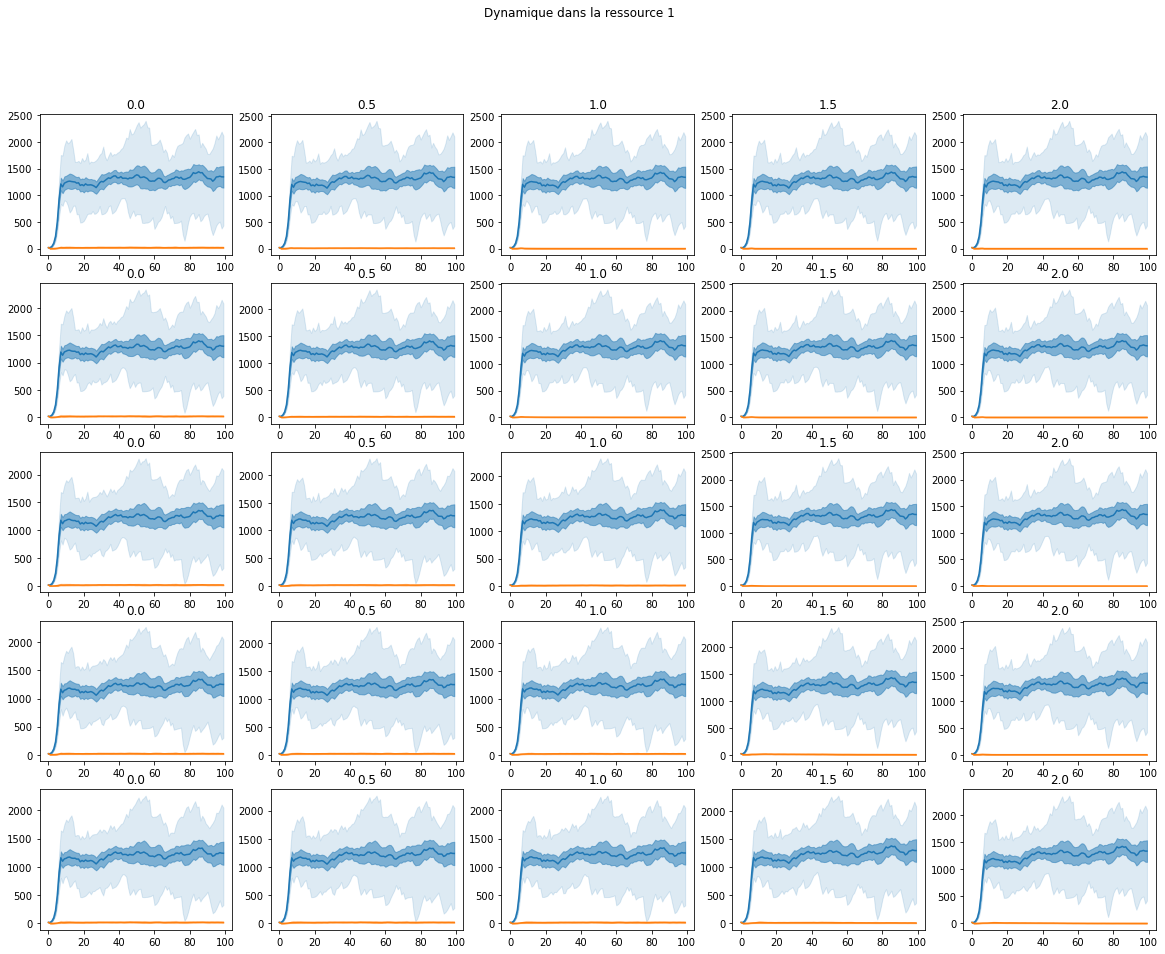

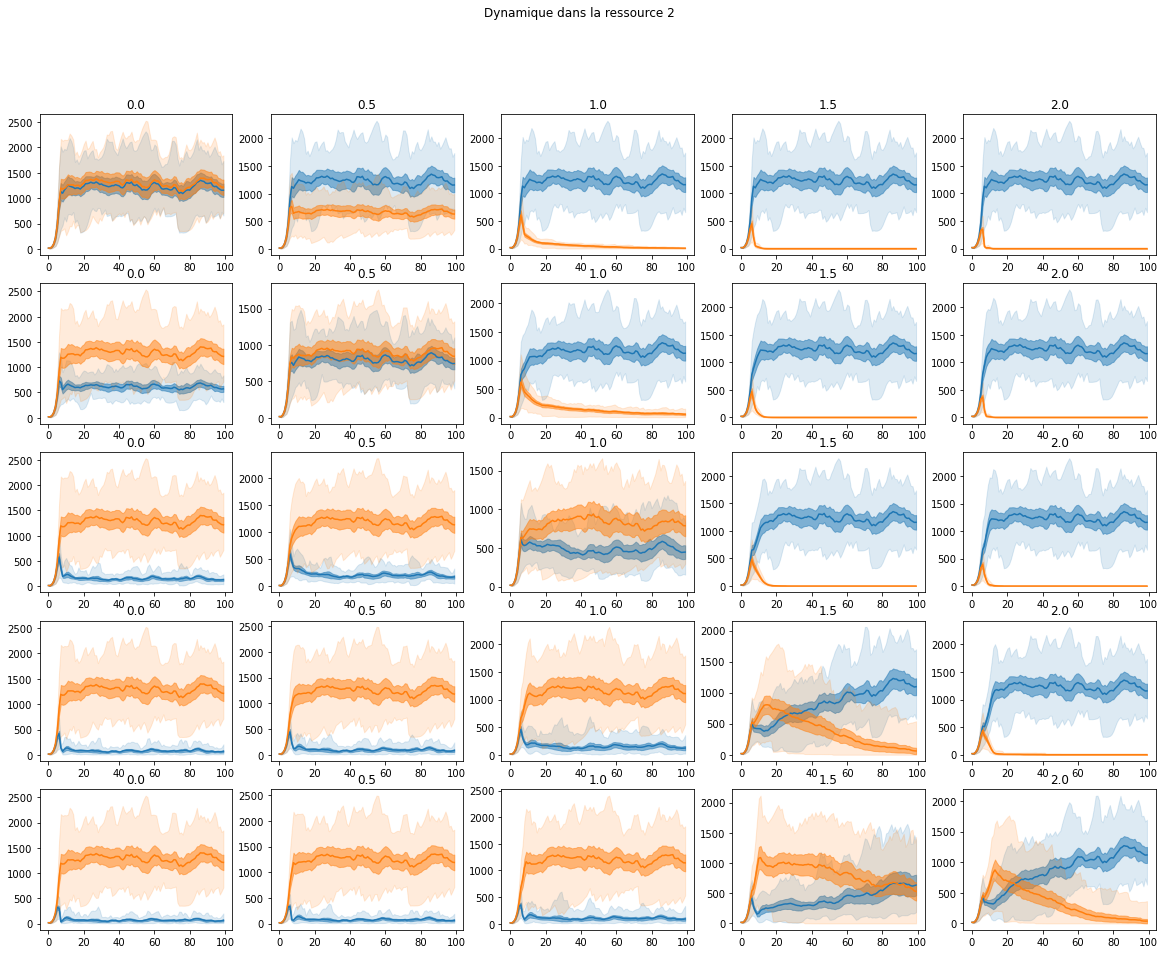

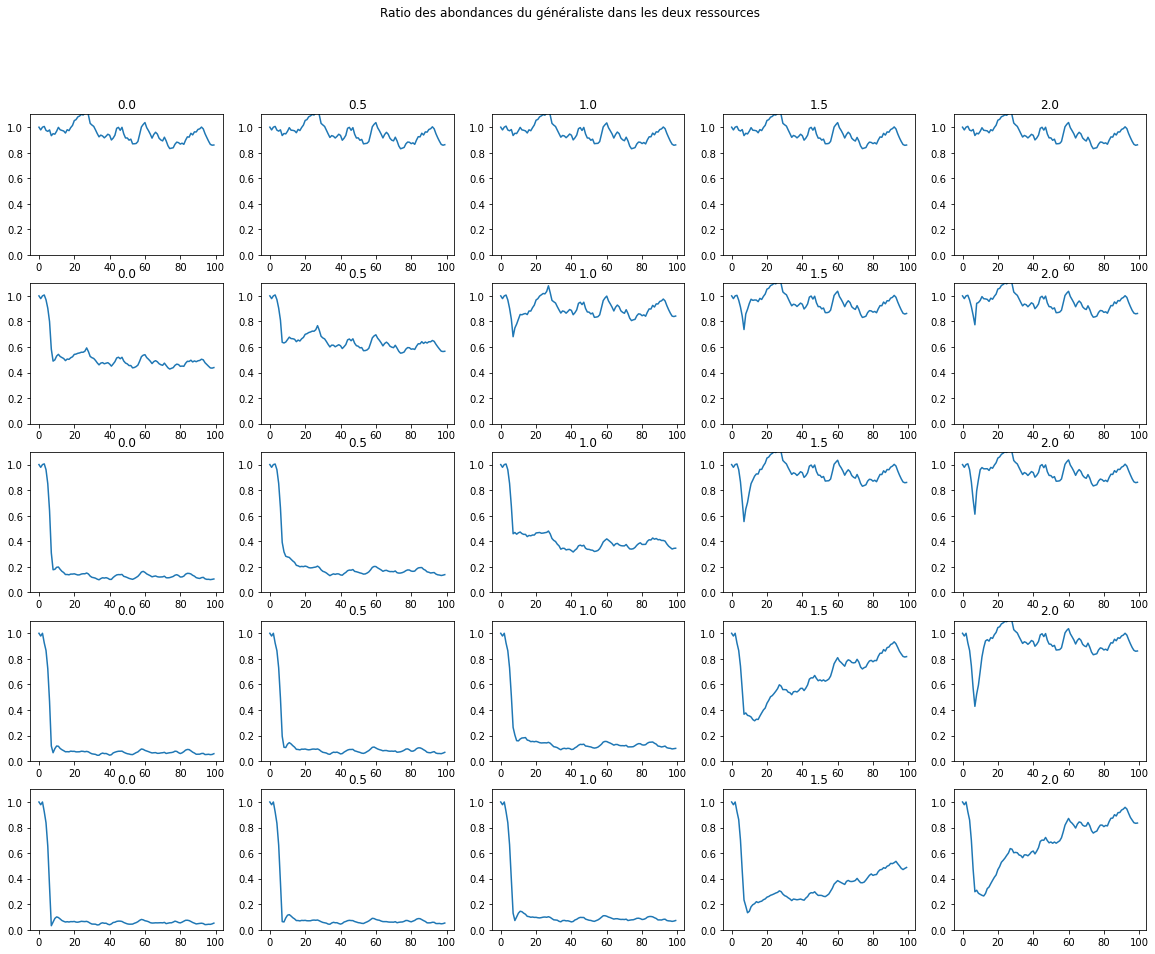

In [128]:
visualisation_ratio_generaliste(liste_iter_site, a_inter, liste_dispo)

In [126]:
len(liste_iter_site)

3